In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from scipy.spatial import distance_matrix
from scipy.stats import pearsonr

from numpy import random
import utils

# Benchmark exchangebility

In [2]:
import load_bgi

In [3]:
fdata_1 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=1, library_id='RNA')
fdata_20 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=20, library_id='RNA')
fdata_50 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=50, library_id='RNA')
fdata_100 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=100, library_id='RNA')
fdata_200 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=200, library_id='RNA')
fdata_500 = load_bgi.load_bin('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.guide.gem', bin_size=500, library_id='RNA')

In [4]:
fdata_1 = utils.combine_guide_replicates(fdata_1)
fdata_20 = utils.combine_guide_replicates(fdata_20)
fdata_50 = utils.combine_guide_replicates(fdata_50)
fdata_100 = utils.combine_guide_replicates(fdata_100)
fdata_200 = utils.combine_guide_replicates(fdata_200)
fdata_500 = utils.combine_guide_replicates(fdata_500)

In [5]:
fdata_1.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin1.h5')
fdata_20.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin20.h5')
fdata_50.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin100.h5')
fdata_100.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin100.h5')
fdata_200.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin200.h5')
fdata_500.write_h5ad('/home/wpy/stereoseq/20240502-SPACseq/gRNA/B926/D03658A6.bin500.h5')

In [6]:
from scipy.stats import entropy

entro_dict_500 = {}
entro_data = fdata_500[fdata_500.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_500.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_500[i] = entropy(guide_vec, ntc_vec)
entro_dict_200 = {}
entro_data = fdata_200[fdata_200.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_200.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_200[i] = entropy(guide_vec, ntc_vec)
entro_dict_100 = {}
entro_data = fdata_100[fdata_100.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_100.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_100[i] = entropy(guide_vec, ntc_vec)
entro_dict_50 = {}
entro_data = fdata_50[fdata_50.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_50.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_50[i] = entropy(guide_vec, ntc_vec)
entro_dict_20 = {}
entro_data = fdata_20[fdata_20.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_20.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_20[i] = entropy(guide_vec, ntc_vec)
entro_dict_1 = {}
entro_data = fdata_1[fdata_1.X.sum(axis=1) > 0].copy()
# ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
for i in fdata_1.var_names:
    # if i == 'sgnon-targeting': continue
    guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
    entro_dict_1[i] = entropy(guide_vec, ntc_vec)

In [7]:
df = pd.concat([pd.DataFrame(entro_dict_1, index=['bin1']),
           pd.DataFrame(entro_dict_20, index=['bin20']),
           pd.DataFrame(entro_dict_50, index=['bin50']),
           pd.DataFrame(entro_dict_100, index=['bin100']),
           pd.DataFrame(entro_dict_200, index=['bin200']),
           pd.DataFrame(entro_dict_500, index=['bin500'])], axis=0).T
for rank in ['1', '20', '50', '100', '200', '500']:
    df.sort_values(by='bin' + rank, inplace=True, ascending=False)
    df['bin' + rank + '_rank'] = np.arange(len(df.index)) + 1
df = df.melt(ignore_index=False).reset_index()
df.columns = ['guide', 'bin_size', 'distance']
ranks = df[df.bin_size.str.endswith('rank')].distance.tolist()
df = df[~df.bin_size.str.endswith('rank')]
df['rank'] = ranks
df

,guide,bin_size,distance,rank
0,sgPomt1,bin1,1.298386,12.0
1,sgNmb,bin1,1.457640,2.0
2,sgL3mbtl3,bin1,1.370952,5.0
3,sgPiezo1,bin1,1.458586,1.0
4,sgS100a11,bin1,1.325334,8.0
...,...,...,...,...
199,sgKlrd1,bin500,0.179840,30.0
200,sgGlb1l2,bin500,0.171603,31.0
201,sgZscan12,bin500,0.167562,32.0
202,sgGata3,bin500,0.146698,33.0


In [8]:
df.loc[df.bin_size == 'bin1', 'rank'] = df.loc[df.bin_size == 'bin1', 'rank'].map(lambda x: x)
df.loc[df.bin_size == 'bin20', 'rank'] = df.loc[df.bin_size == 'bin20', 'rank'].map(lambda x: x + 50)
df.loc[df.bin_size == 'bin50', 'rank'] = df.loc[df.bin_size == 'bin50', 'rank'].map(lambda x: x + 100)
df.loc[df.bin_size == 'bin100', 'rank'] = df.loc[df.bin_size == 'bin100', 'rank'].map(lambda x: x + 150)
df.loc[df.bin_size == 'bin200', 'rank'] = df.loc[df.bin_size == 'bin200', 'rank'].map(lambda x: x + 200)
df.loc[df.bin_size == 'bin500', 'rank'] = df.loc[df.bin_size == 'bin500', 'rank'].map(lambda x: x + 250)

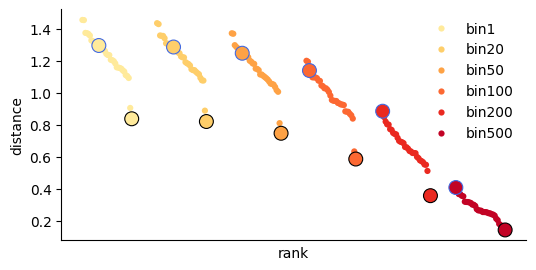

In [9]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='rank', y='distance', hue='bin_size', edgecolor='none', s=20, palette='YlOrRd')
plt.legend(bbox_to_anchor=(1, 1), frameon=False)
sns.scatterplot(data=df[df.guide == 'sgZc3h12a'], x='rank', y='distance', hue='bin_size', edgecolor='black', s=100, legend=False, palette='YlOrRd')
sns.scatterplot(data=df[df.guide == 'sgPomt1'], x='rank', y='distance', hue='bin_size', edgecolor='royalblue', s=100, legend=False, palette='YlOrRd')
plt.xticks([])
sns.despine()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/exchangable_benchmark.pdf', bbox_inches='tight', format='pdf')

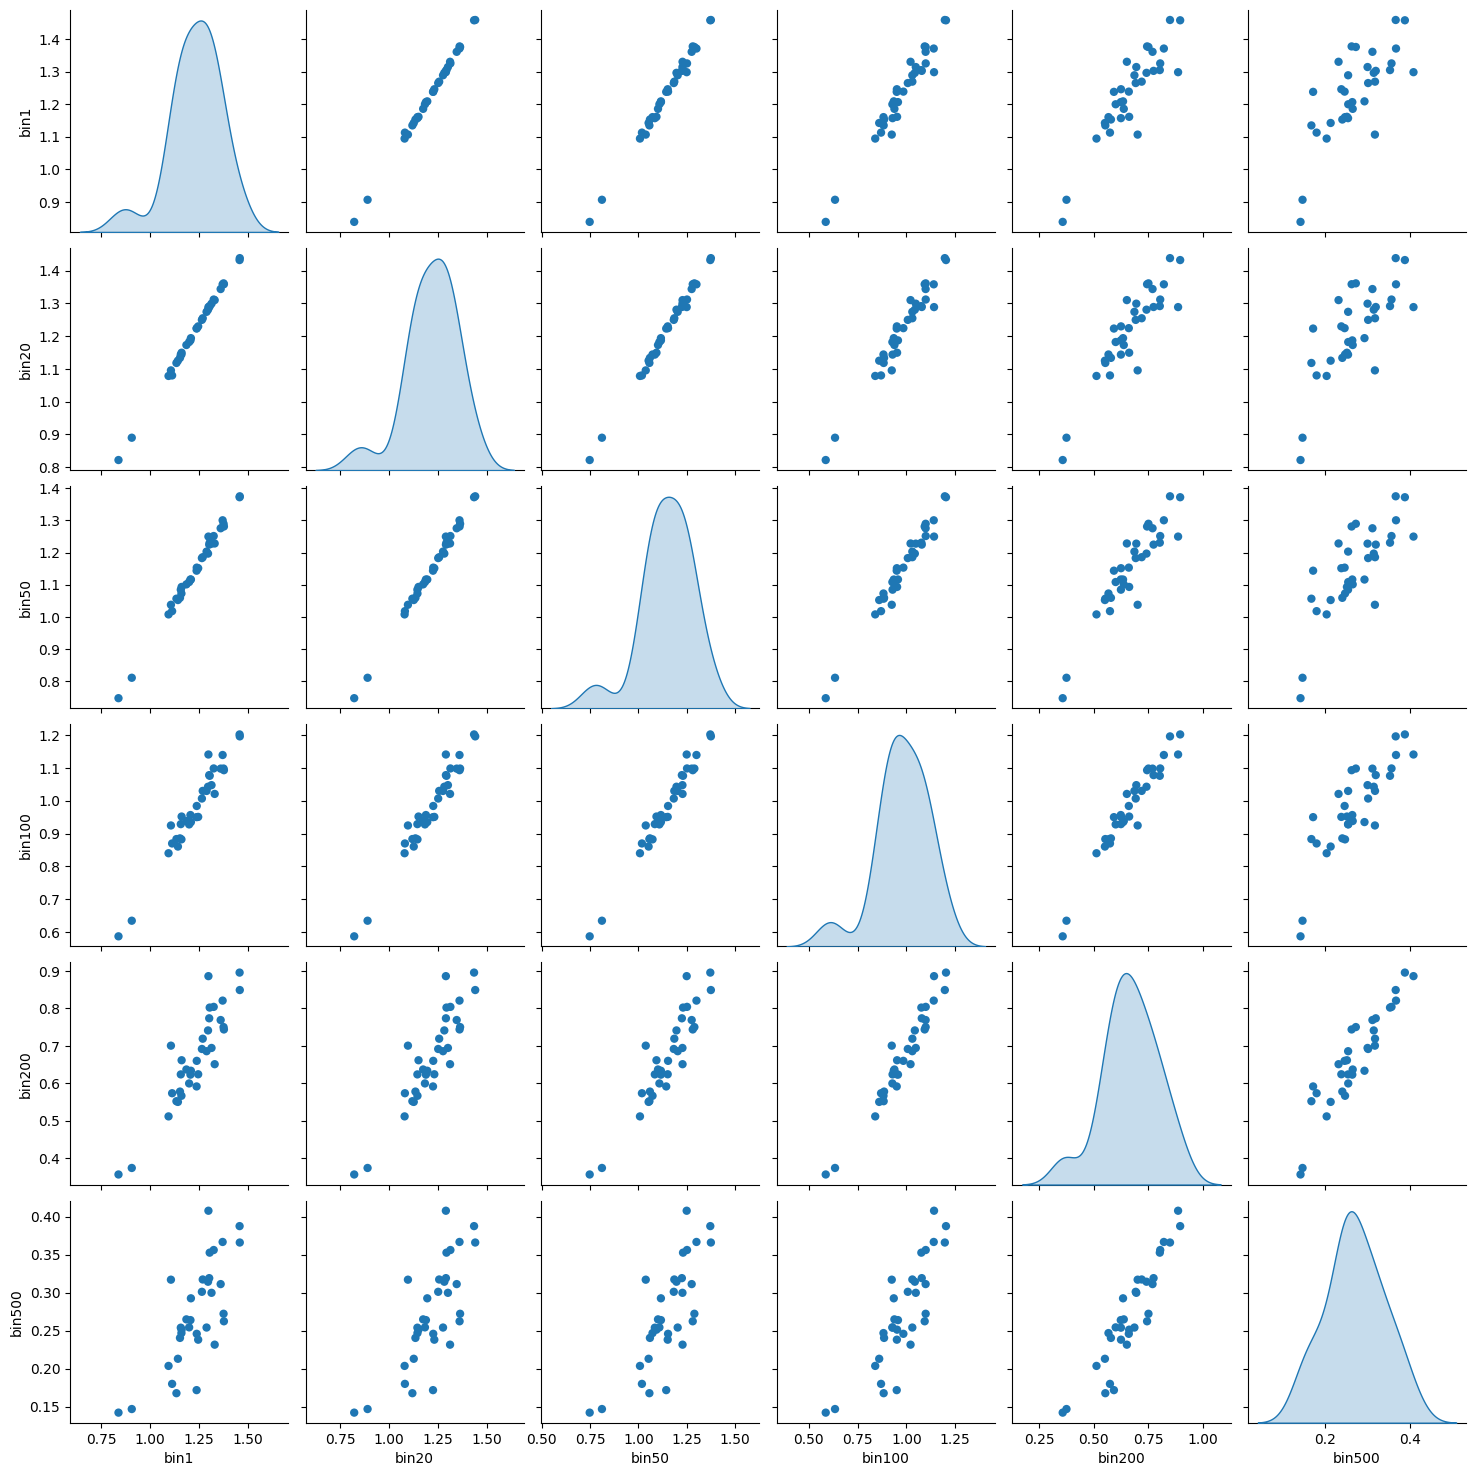

In [94]:
df = pd.concat([pd.DataFrame(entro_dict_1, index=['bin1']),
           pd.DataFrame(entro_dict_20, index=['bin20']),
           pd.DataFrame(entro_dict_50, index=['bin50']),
           pd.DataFrame(entro_dict_100, index=['bin100']),
           pd.DataFrame(entro_dict_200, index=['bin200']),
           pd.DataFrame(entro_dict_500, index=['bin500'])], axis=0).T
for rank in ['1', '20', '50', '100', '200', '500']:
    df.sort_values(by='bin' + rank, inplace=True, ascending=False)
    df['bin' + rank + '_rank'] = np.arange(len(df.index)) + 1
df = df.loc[:, ~df.columns.str.endswith('rank')]
# plt.figure(figsize=(3, 3))
sns.pairplot(df, diag_kind='kde', kind='scatter', plot_kws={'edgecolor': 'none'})

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/exchangable_spearman.pdf', bbox_inches='tight', format='pdf')

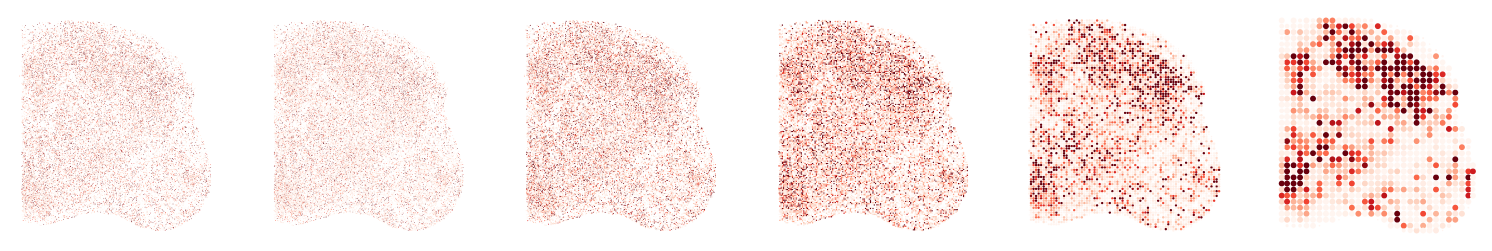

In [81]:
_, ax = plt.subplots(1, 6, figsize=(19, 3))
plot_data = fdata_1[fdata_1.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[0.25 if x > 0 else x / 4 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[0])
plot_data = fdata_20[fdata_20.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[0.25 if x > 1 else x / 2 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[1])
plot_data = fdata_50[fdata_50.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[0.5 if x > 1 else x / 2 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[2])
plot_data = fdata_100[fdata_100.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[1 if x > 2 else x / 2 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[3])
plot_data = fdata_200[fdata_200.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[3 if x > 6 else x / 2 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[4])
plot_data = fdata_500[fdata_500.X.sum(axis=1) > 0, :]
values = plot_data.X.sum(axis=1)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=values, cmap='Reds', vmax=np.quantile(values, 0.9), vmin=np.quantile(values, 0.2),
                s=[18 if x > 36 else x / 2 for x in plot_data.X.sum(axis=1)], edgecolor='none', ax=ax[5])
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()
ax[3].invert_yaxis()
ax[4].invert_yaxis()
ax[5].invert_yaxis()
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[4].set_xticks([])
ax[4].set_yticks([])
ax[5].set_xticks([])
ax[5].set_yticks([])
sns.despine(left=True, bottom=True)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/exchangable_spatial.pdf', bbox_inches='tight', format='pdf')

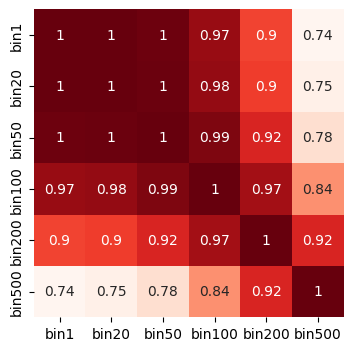

In [93]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.corr(), cmap='Reds', vmax=1, annot=True, cbar=False)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/exchangable_spearman_heat.pdf', bbox_inches='tight', format='pdf')

# Processing

In [2]:
import utils

fdata = sc.read_h5ad("/home/wpy/stereoseq/20240502-SPACseq/RNA/Multitime.clustered.h5")
gdata = sc.read_h5ad("/home/wpy/stereoseq/20240502-SPACseq/RNA/Multitime.filtered.guide.bin100.h5")

gdata.obs.marker = gdata.obs.marker.map({
    'B926-1': '2-1',
    'B926-2': '2-2',
    'B924-1': '1-1',
    'B924-2': '1-2',
    'B922-1': '3-1',
    'B922-2': '3-2'
})

fdata.obs['coord_x'] = fdata.obsm['spatial'][:, 0] // 100 * 100
fdata.obs['coord_y'] = fdata.obsm['spatial'][:, 1] // 100 * 100

gdata.obs['coord_x'] = gdata.obsm['spatial'][:, 0] // 100 * 100
gdata.obs['coord_y'] = gdata.obsm['spatial'][:, 1] // 100 * 100
fdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(fdata.obs['marker'], fdata.obs['coord_x'], fdata.obs['coord_y'])]
gdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(gdata.obs['marker'], gdata.obs['coord_x'], gdata.obs['coord_y'])]

common_bins = np.intersect1d(fdata.obs_names, gdata.obs_names)
fdata = fdata[common_bins].copy()
gdata = gdata[common_bins].copy()

gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240822-Pipeline/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [15]:
df = pd.concat([pd.DataFrame(gdata.X, index=gdata.obs_names), gdata.obs.marker], axis=1).groupby('marker').sum()
df.columns = gdata.var_names
df['sgCd44']

/tmp/ipykernel_68749/3737724301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([pd.DataFrame(gdata.X, index=gdata.obs_names), gdata.obs.marker], axis=1).groupby('marker').sum()


marker
3-1      0
3-2      3
1-1    166
1-2     77
2-1     62
2-2    627
Name: sgCd44, dtype: int64

In [ ]:
import utils

fdata = sc.read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/reclustered.h5")
gdata = sc.read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.combined.")

Index(['A1cf', 'A26c2', 'A2m', 'A3galt2', 'A4galt', 'A4gnt', 'AA467197',
       'AA543186', 'AA792892', 'AA986860',
       ...
       'Zw10', 'Zwilch', 'Zwint', 'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx',
       'Zzz3', 'a'],
      dtype='object', length=13800)

# KDE plot

In [5]:
gdata

AnnData object with n_obs × n_vars = 118279 × 34
    obs: 'marker', 'coord_x', 'coord_y'
    obsm: 'spatial'

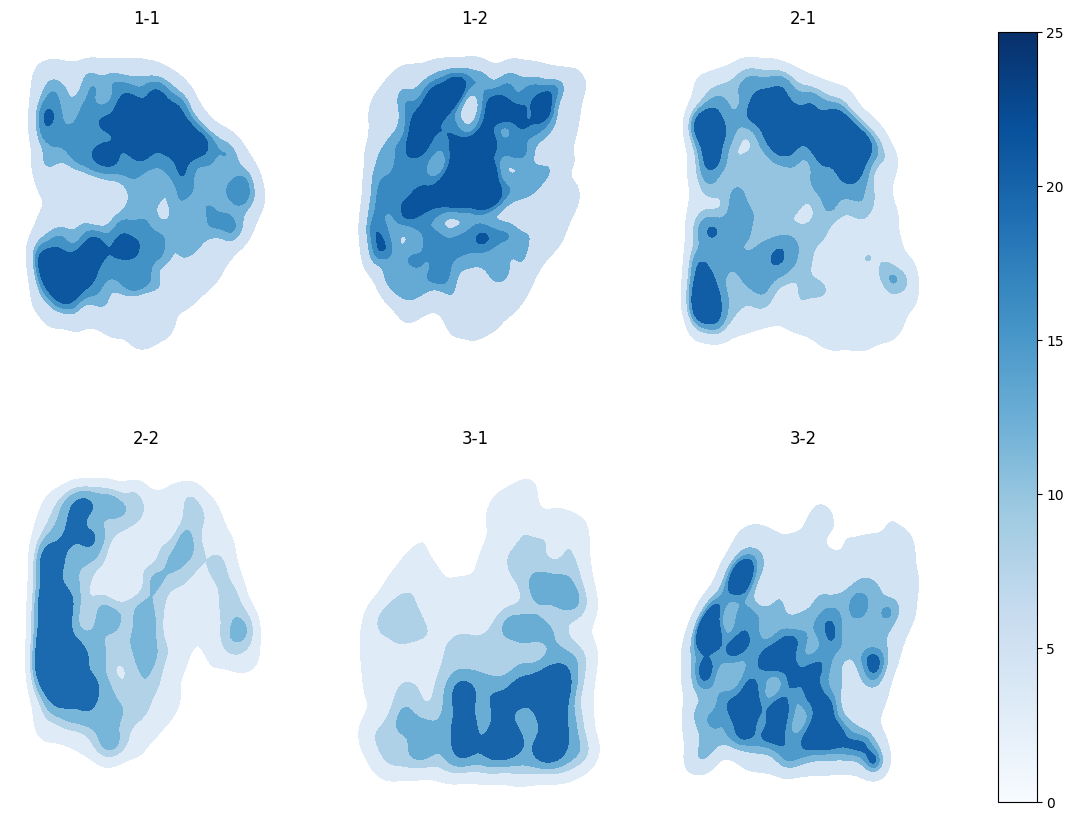

In [6]:
# 创建一个大的图形来包含所有子图
fig = plt.figure(figsize=(15, 10))

# 计算所有数据的最大权重值用于统一colorbar
max_weight = 0
for marker in gdata.obs.marker.unique():
    plot_data = gdata[gdata.obs.marker == marker]
    max_weight = max(max_weight, plot_data.X.toarray().sum(axis=1).max())

# 绘制子图
for i, marker in enumerate(gdata.obs.marker.unique(), 1):
    plot_data = gdata[gdata.obs.marker == marker]
    
    ax = fig.add_subplot(2, 3, i)
    sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                weights=plot_data.X.toarray().sum(axis=1).flatten(), cmap='Blues', alpha=1,
                fill=True, bw_adjust=0.6, levels=5)
    ax.invert_yaxis()
    sns.despine(left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(marker)

# 添加colorbar
norm = plt.Normalize(vmin=0, vmax=max_weight)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
plt.colorbar(sm, ax=fig.axes)

# plt.tight_layout()
# plt.savefig('./guide_kde_plot_raw_all.pdf', bbox_inches='tight', format='pdf')
plt.show()

# Spatial Permutation of Bins

In [45]:
plot_data = gdata[gdata.obs.marker == '2-1']
plot_data

View of AnnData object with n_obs × n_vars = 23055 × 34
    obs: 'marker', 'coord_x', 'coord_y'
    obsm: 'spatial'

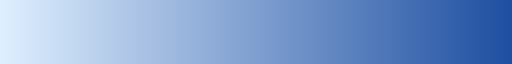

In [195]:
from types import new_class
from matplotlib.colors import LinearSegmentedColormap

colors = ['#dfefff', '#1f4fa1']
n_bins = 256
new_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=n_bins)
new_cmap

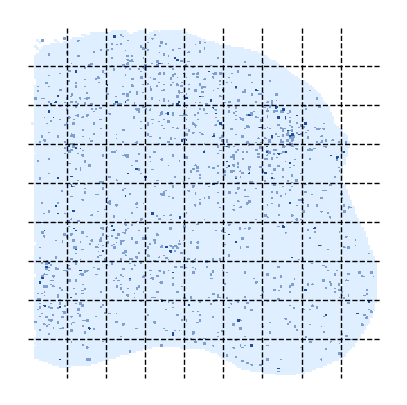

In [5]:
plt.figure(figsize=(5, 5))

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min() - 200, plot_data.obsm['spatial'][:, 0].max() + 200, 10)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min() - 200, plot_data.obsm['spatial'][:, 1].max() + 200, 10)

sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=4, alpha=1, c=plot_data[:, 'sgnon-targeting'].X.toarray().flatten(), edgecolor='none',
                cmap=new_cmap, vmax=2, marker='s')

for i in range(len(x_grid)):
    if i != 0 and i != len(x_grid) - 1:
        plt.vlines(x_grid[i], y_grid.min(), y_grid.max(), color='black', alpha=1, linestyles='--', linewidth=1)
for j in range(len(y_grid)):
    if j != 0 and j != len(y_grid) - 1:
        plt.hlines(y_grid[j], x_grid.min(), x_grid.max(), color='black', alpha=1, linestyles='--', linewidth=1)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.show()

/tmp/ipykernel_38328/39587129.py:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=kde_data.obsm['spatial'][:, 0], y=kde_data.obsm['spatial'][:, 1], weights=kde_data[:, 'sgnon-targeting'].X.toarray().flatten(),
/tmp/ipykernel_38328/39587129.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=kde_data.obsm['spatial'][:, 0], y=kde_data.obsm['spatial'][:, 1], weights=kde_data[:, 'sgnon-targeting'].X.toarray().flatten(),


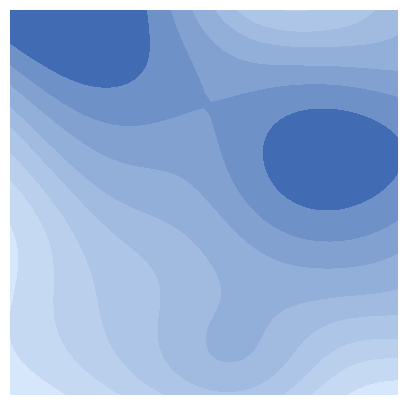

In [6]:
region = [[2000, 6000], [2000, 6000]]

plt.figure(figsize=(5, 5))
kde_data = plot_data[((plot_data.obsm['spatial'][:, 0] > region[0][0]) & (plot_data.obsm['spatial'][:, 0] < region[0][1]) &
                     (plot_data.obsm['spatial'][:, 1] > region[1][0]) & (plot_data.obsm['spatial'][:, 1] < region[1][1]))]

sns.kdeplot(x=kde_data.obsm['spatial'][:, 0], y=kde_data.obsm['spatial'][:, 1], weights=kde_data[:, 'sgnon-targeting'].X.toarray().flatten(),
            cmap=new_cmap, shade=True, shade_lowest=False, alpha=1, bw_adjust=0.5)
plt.xlim([4000, 5500])
plt.ylim([2000, 3500])
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.show()

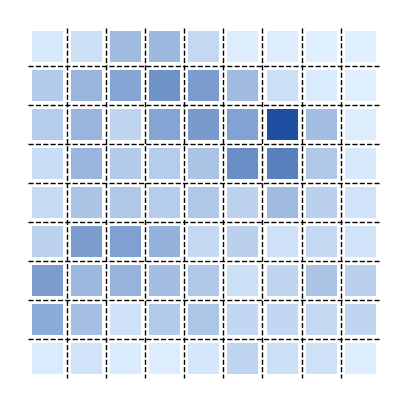

In [7]:
plt.figure(figsize=(5, 5))

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min() - 200, plot_data.obsm['spatial'][:, 0].max() + 200, 10)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min() - 200, plot_data.obsm['spatial'][:, 1].max() + 200, 10)

bandwidth_x = (x_grid[1] - x_grid[0]) / 2
bandwidth_y = (y_grid[1] - y_grid[0]) / 2

x_points = []
y_points = []
z_value = []

x_grid_iter = list(x_grid)
y_grid_iter = list(y_grid)

for i in range(len(x_grid_iter) - 1):
    for j in range(len(y_grid_iter) - 1):
        x_points.append(x_grid_iter[i] + bandwidth_x)
        y_points.append(y_grid_iter[j] + bandwidth_y)
        z_value.append(plot_data[((plot_data.obsm['spatial'][:, 0] > x_grid_iter[i]) & (plot_data.obsm['spatial'][:, 0] < x_grid_iter[i+1])) &
                                 ((plot_data.obsm['spatial'][:, 1] > y_grid_iter[j]) & (plot_data.obsm['spatial'][:, 1] < y_grid_iter[j+1])),
                                 'sgnon-targeting'].X.toarray().flatten().sum())

# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=4, alpha=1, c=plot_data[:, 'sgnon-targeting'].X.toarray().flatten(), edgecolor='none',
#                 cmap=new_cmap, vmax=2, marker='s')
sns.scatterplot(x=x_points, y=y_points, s=500, alpha=1, c=z_value, edgecolor='none',
                cmap=new_cmap, marker='s')

for i in range(len(x_grid)):
    if i != 0 and i != len(x_grid) - 1:
        plt.vlines(x_grid[i], y_grid.min(), y_grid.max(), color='black', alpha=1, linestyles='--', linewidth=1)
for j in range(len(y_grid)):
    if j != 0 and j != len(y_grid) - 1:
        plt.hlines(y_grid[j], x_grid.min(), x_grid.max(), color='black', alpha=1, linestyles='--', linewidth=1)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.show()

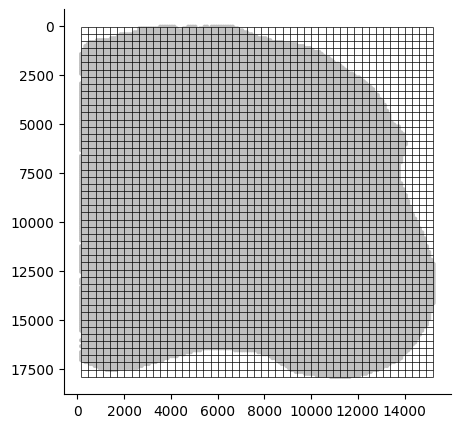

In [14]:
plt.figure(figsize=(5, 5))

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50)

sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=10, alpha=1, color='silver', edgecolor='none')

for i in range(len(x_grid)):
    plt.vlines(x_grid[i], y_grid.min(), y_grid.max(), color='black', alpha=1, linestyles='-', linewidth=0.5)
for j in range(len(y_grid)):
    plt.hlines(y_grid[j], x_grid.min(), x_grid.max(), color='black', alpha=1, linestyles='-', linewidth=0.5)

plt.gca().invert_yaxis()
sns.despine()
plt.show()

In [36]:
guide = 'sgnon-targeting'

cnt_ntc_df = pd.DataFrame(plot_data[:, guide].X.toarray(), columns=[guide])
cnt_ntc_df['x'] = plot_data.obsm['spatial'][:, 0]
cnt_ntc_df['y'] = plot_data.obsm['spatial'][:, 1]

cnt_ntc_df['grid_x'] = np.searchsorted(x_grid, cnt_ntc_df['x'], side='right') - 1
cnt_ntc_df['grid_x'] = x_grid[cnt_ntc_df['grid_x']]

cnt_ntc_df['grid_y'] = np.searchsorted(y_grid, cnt_ntc_df['y'], side='right') - 1
cnt_ntc_df['grid_y'] = y_grid[cnt_ntc_df['grid_y']]

cnt_ntc_df = cnt_ntc_df.groupby(['grid_x', 'grid_y'])[guide].sum().reset_index()
cnt_ntc_df

,grid_x,grid_y,sgnon-targeting
0,165.0,788.408163,0
1,165.0,1152.612245,0
2,165.0,1516.816327,0
3,165.0,1881.020408,0
4,165.0,2245.224490,0
...,...,...,...
2101,15237.0,12442.938776,0
2102,15237.0,12807.142857,0
2103,15237.0,13171.346939,0
2104,15237.0,13535.551020,0


In [37]:
# 获取所有唯一的grid_x和grid_y值
unique_x = np.sort(cnt_ntc_df['grid_x'].unique())
unique_y = np.sort(cnt_ntc_df['grid_y'].unique())

# 创建所有可能的x,y组合
grid_x, grid_y = np.meshgrid(unique_x, unique_y)
all_combinations = pd.DataFrame({
    'grid_x': grid_x.flatten(),
    'grid_y': grid_y.flatten()
})

# 与原始cnt_df合并,对于没有值的位置填充0
cnt_ntc_df = pd.merge(all_combinations, cnt_ntc_df, on=['grid_x', 'grid_y'], how='left')
cnt_ntc_df['sgnon-targeting'] = cnt_ntc_df['sgnon-targeting'].fillna(0)

In [84]:
import statsmodels.api as sm

guide = 'sgnon-targeting'

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50)
cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max(), 0.25)

X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, guide].X.flatten()],
                      var_type='cco',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])

kde_values = kde.pdf(grid_coords).reshape(X.shape)

In [85]:
kde_matrix = np.zeros((kde_values.shape[0], kde_values.shape[1]))
for i in range(kde_values.shape[2]):
    kde_matrix += kde_values[:, :, i] * cnt_grid[i]
kde_matrix.shape

(50, 50)

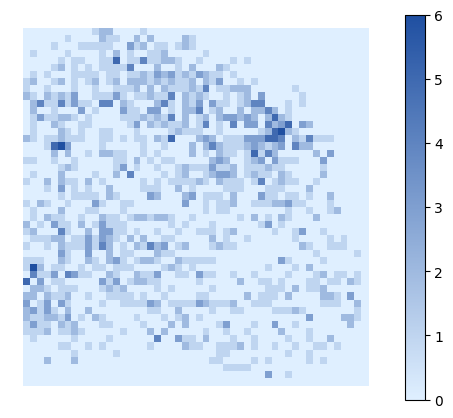

In [38]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(cnt_ntc_df.grid_x, cnt_ntc_df.grid_y, 
                     c=cnt_ntc_df[guide], s=30, cmap=new_cmap, edgecolor='none', marker='s')
plt.colorbar(scatter)
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.xlabel('')
plt.ylabel('')

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./supplementary_images/sgnon-targeting_raw.pdf', bbox_inches='tight')
plt.show()

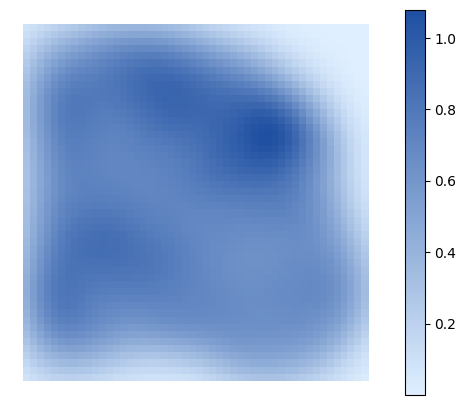

In [108]:
kde_matrix = kde_matrix / kde_matrix.sum() * plot_data[:, guide].X.sum()

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X[:, :, 0].flatten(), Y[:, :, 0].flatten(),
                     c=kde_matrix.flatten(), s=30, cmap=new_cmap, edgecolor='none', marker='s')
plt.colorbar(scatter)
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./supplementary_images/sgnon-targeting_kde.pdf', bbox_inches='tight')
plt.show()

In [39]:
guide = 'sgCd44'

cnt_df = pd.DataFrame(plot_data[:, guide].X.toarray(), columns=[guide])
cnt_df['x'] = plot_data.obsm['spatial'][:, 0]
cnt_df['y'] = plot_data.obsm['spatial'][:, 1]

cnt_df['grid_x'] = np.searchsorted(x_grid, cnt_df['x'], side='right') - 1
cnt_df['grid_x'] = x_grid[cnt_df['grid_x']]

cnt_df['grid_y'] = np.searchsorted(y_grid, cnt_df['y'], side='right') - 1
cnt_df['grid_y'] = y_grid[cnt_df['grid_y']]

cnt_df = cnt_df.groupby(['grid_x', 'grid_y'])[guide].sum().reset_index()
cnt_df

,grid_x,grid_y,sgCd44
0,165.0,788.408163,0
1,165.0,1152.612245,0
2,165.0,1516.816327,0
3,165.0,1881.020408,0
4,165.0,2245.224490,0
...,...,...,...
2101,15237.0,12442.938776,0
2102,15237.0,12807.142857,0
2103,15237.0,13171.346939,0
2104,15237.0,13535.551020,0


In [40]:
# 获取所有唯一的grid_x和grid_y值
unique_x = np.sort(cnt_df['grid_x'].unique())
unique_y = np.sort(cnt_df['grid_y'].unique())

# 创建所有可能的x,y组合
grid_x, grid_y = np.meshgrid(unique_x, unique_y)
all_combinations = pd.DataFrame({
    'grid_x': grid_x.flatten(),
    'grid_y': grid_y.flatten()
})

# 与原始cnt_df合并,对于没有值的位置填充0
cnt_df = pd.merge(all_combinations, cnt_df, on=['grid_x', 'grid_y'], how='left')
cnt_df['sgCd44'] = cnt_df['sgCd44'].fillna(0)

In [132]:
import statsmodels.api as sm

guide = 'sgCd44'

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50)
cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max() + 2, 0.25)

X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, guide].X.flatten()],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])

kde_values = kde.pdf(grid_coords).reshape(X.shape)

In [133]:
kde_matrix = np.zeros((kde_values.shape[0], kde_values.shape[1]))
for i in range(kde_values.shape[2]):
    kde_matrix += kde_values[:, :, i] * cnt_grid[i]
kde_matrix.shape

(50, 50)

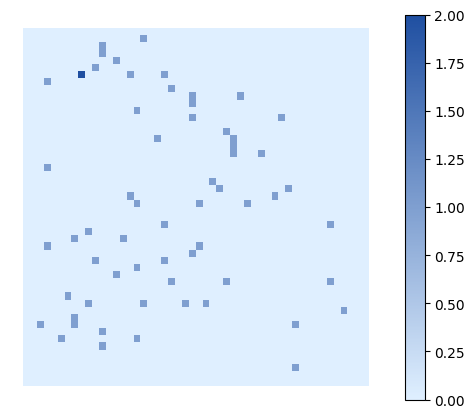

In [34]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(cnt_df.grid_x, cnt_df.grid_y, 
                     c=cnt_df[guide], s=30, cmap=new_cmap, edgecolor='none', marker='s')
plt.colorbar(scatter)
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.xlabel('')
plt.ylabel('')

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./supplementary_images/sgCd44_raw.pdf', bbox_inches='tight')
plt.show()

In [126]:
shulffled_guide_cnt.values
np.random.shuffle(shulffled_guide_cnt.values)
shulffled_guide_cnt.index

Index([1919, 2243,  862, 1319,  439,  973,  706, 1077,  604, 1951,
       ...
       1406, 1452, 1990,  670,  672, 2172, 1079, 1746, 1088,  629],
      dtype='int64', length=192)

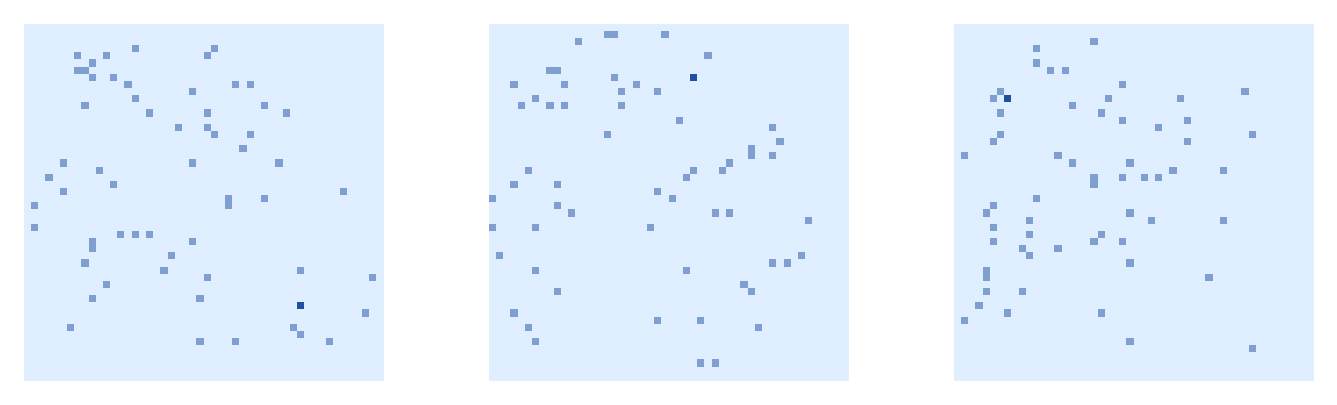

In [147]:
permute_matrix = np.zeros([3, 2500])
for i in range(3):
    cdf = pd.concat([cnt_df, cnt_ntc_df], axis=1)[['sgCd44', 'sgnon-targeting']]

    idx_ntc = cdf.columns.get_loc('sgnon-targeting')
    t_bins = [a or b for a, b in zip([a for a in cdf.loc[:, 'sgCd44']], [a for a in cdf.loc[:, 'sgnon-targeting'] > 0])]
    guide_cnt = cdf.loc[np.where(t_bins), 'sgCd44']

    # 只shuffle 20%的sample
    num_to_shuffle = int(len(guide_cnt) * 1)
    indices_to_shuffle = random.sample(range(len(guide_cnt)), num_to_shuffle)
    shulffled_guide_cnt = guide_cnt.iloc[indices_to_shuffle].copy()
    random.shuffle(shulffled_guide_cnt.values)

    guide_cnt.iloc[indices_to_shuffle] = shulffled_guide_cnt

    permute_vec = np.zeros(len(t_bins))
    permute_vec[np.where(t_bins)] = guide_cnt
    permute_matrix[i, :] = permute_vec

_, ax = plt.subplots(1, 3, figsize=(17, 5))
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=permute_matrix[0, :], s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[0])
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=permute_matrix[1, :], s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[1])
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=permute_matrix[2, :], s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[2])
# ax[3].colorbar(scatter.collections[0])
sns.despine(left=True, bottom=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/sgCd44_permuatation.pdf', bbox_inches='tight')
plt.show()

In [ ]:
1000

In [192]:
import statsmodels.api as sm

guide = 'sgCd44'

x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50)
y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50)
cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max() + 2, 0.25)

X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

kde = sm.nonparametric.KDEMultivariate(data=[cnt_df.grid_x,
                                             cnt_df.grid_y,
                                             permute_matrix[0, :]],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])

kde_values_1 = kde.pdf(grid_coords).reshape(X.shape)
kde_matrix_1 = np.zeros((kde_values_1.shape[0], kde_values_1.shape[1]))
for i in range(kde_values_1.shape[2]):
    kde_matrix_1 += kde_values_1[:, :, i] * cnt_grid[i]
kde_matrix_1.shape

kde = sm.nonparametric.KDEMultivariate(data=[cnt_df.grid_x,
                                             cnt_df.grid_y,
                                             permute_matrix[1, :]],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])

kde_values_2 = kde.pdf(grid_coords).reshape(X.shape)
kde_matrix_2 = np.zeros((kde_values_2.shape[0], kde_values_2.shape[1]))
for i in range(kde_values_2.shape[2]):
    kde_matrix_2 += kde_values_2[:, :, i] * cnt_grid[i]
kde_matrix_2.shape

kde = sm.nonparametric.KDEMultivariate(data=[cnt_df.grid_x,
                                             cnt_df.grid_y,
                                             permute_matrix[2, :]],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])

kde_values_3 = kde.pdf(grid_coords).reshape(X.shape)
kde_matrix_3 = np.zeros((kde_values_3.shape[0], kde_values_3.shape[1]))
for i in range(kde_values_3.shape[2]):
    kde_matrix_3 += kde_values_3[:, :, i] * cnt_grid[i]
kde_matrix_3.shape

(50, 50)

In [ ]:
kde.bw 1000

In [193]:
kde_matrix_1 = kde_matrix_1 / kde_matrix_1.sum() * plot_data[:, guide].X.sum()
kde_matrix_2 = kde_matrix_2 / kde_matrix_2.sum() * plot_data[:, guide].X.sum()
kde_matrix_3 = kde_matrix_3 / kde_matrix_3.sum() * plot_data[:, guide].X.sum()

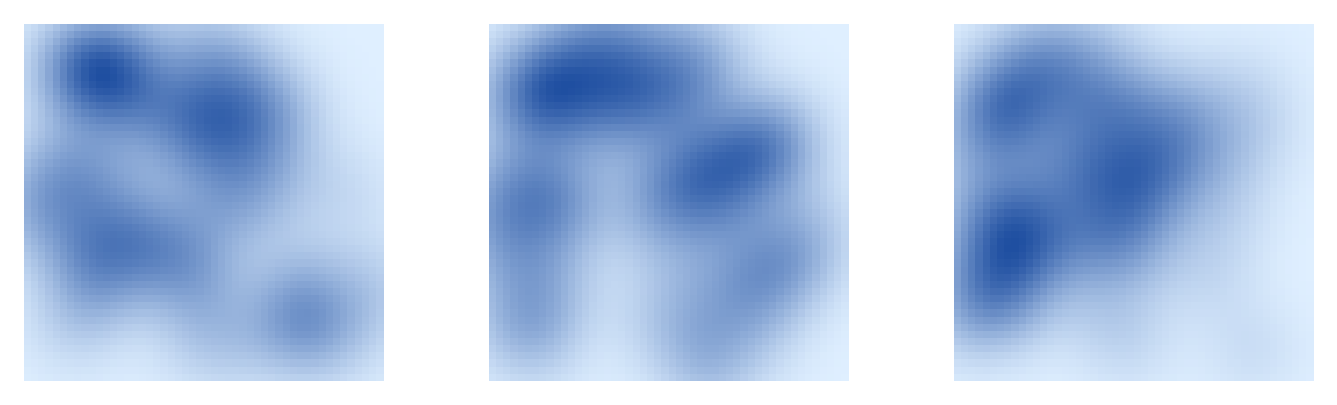

In [196]:
_, ax = plt.subplots(1, 3, figsize=(17, 5))
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=kde_matrix_1.flatten(), s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[0])
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=kde_matrix_2.flatten(), s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[1])
scatter = sns.scatterplot(x=cnt_df.grid_x, y=cnt_df.grid_y, 
                          c=kde_matrix_3.flatten(), s=30, cmap=new_cmap, edgecolor='none', marker='s', ax=ax[2])
# ax[3].colorbar(scatter.collections[0])
sns.despine(left=True, bottom=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/sgCd44_permuatation_kde.pdf', bbox_inches='tight')
plt.show()

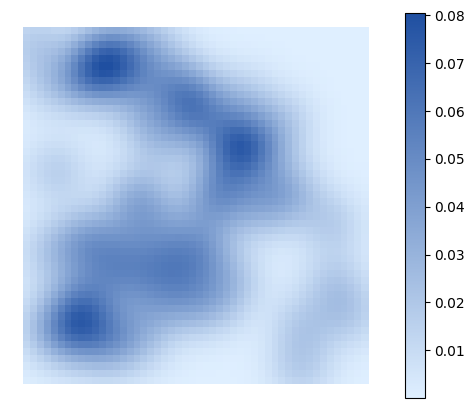

In [134]:
kde_matrix = kde_matrix / kde_matrix.sum() * plot_data[:, guide].X.sum()

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X[:, :, 0].flatten(), Y[:, :, 0].flatten(),
                     c=kde_matrix.flatten(), s=30, cmap=new_cmap, edgecolor='none', marker='s')
plt.colorbar(scatter)
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./supplementary_images/sgCd44_kde.pdf', bbox_inches='tight')
plt.show()

# Permutation without KL divergence

In [120]:
import random

def permute_guide_bins(expr_matrix, idx_guide, idx_ntc):
    t_bins = (expr_matrix[:, idx_guide] > 0) | (expr_matrix[:, idx_ntc] > 0)
    guide_vec = expr_matrix[t_bins, idx_guide]
    ntc_vec = expr_matrix[t_bins, idx_ntc]
    
    # 对每个bin有0.5的概率交换guide和ntc的值
    for i in range(len(guide_vec)):
        if random.random() < 0.5:
            guide_vec[i], ntc_vec[i] = ntc_vec[i], guide_vec[i]
            
    ret_guide_vec = expr_matrix[:, idx_guide]
    ret_guide_vec[t_bins] = guide_vec
    return ret_guide_vec

def permute_all_bins(expr_matrix, idx_guide):
    guide_cnt = expr_matrix[:, idx_guide]
    random.shuffle(guide_cnt)
    permute_vec = np.zeros(expr_matrix.shape[0])
    permute_vec = guide_cnt
    return permute_vec

In [121]:
expr_matrix = gdata.X.copy()
idx_guide = gdata.var.index.get_loc('sgCd44')

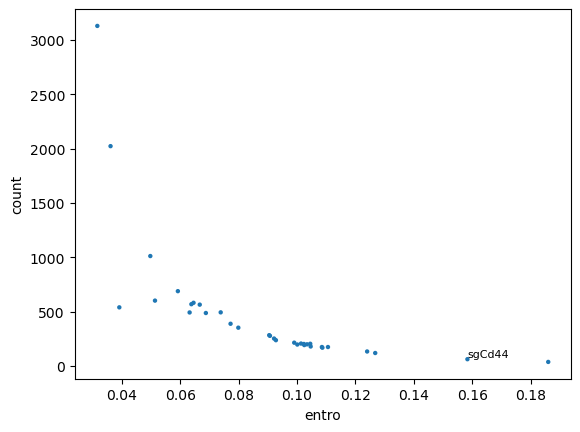

In [122]:
# from scipy.stats import entropy
pdata = gdata[gdata.obs.marker == '2-1'].copy()
# from tqdm import tqdm
# qk_guide = gdata.X.sum(axis=1).flatten() / gdata.X.sum()
qk_guide = pdata[:, 'sgnon-targeting'].X.flatten() / pdata[:, 'sgnon-targeting'].X.sum()
eps = 1 / pdata[:, 'sgnon-targeting'].X.flatten().sum()
qk_guide = qk_guide + eps
# qk_guide = np.where(qk_guide == 0, eps, qk_guide)
entro = {}

def _kl_divergence(pk, qk):
    """Compute KL divergence between two probability distributions"""
    return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))

for guide in pdata.var_names:
    if guide != 'sgnon-targeting':
        pk_guide = pdata[:, guide].X.flatten() / pdata[:, guide].X.sum()
        pk_guide = pk_guide + eps
        # pk_guide = np.where(pk_guide == 0, eps, pk_guide)
        # pk_guide = pk_guide + eps
        # qk_guide = gdata[:, ['sgnon-targeting', guide]].X.sum(axis=1).flatten() / gdata[:, ['sgnon-targeting', guide]].X.sum()
        entro[guide] = _kl_divergence(pk_guide / pk_guide.sum(), qk_guide / qk_guide.sum())
        # print(entro)

cd = pd.DataFrame(entro, index=['entro']).T
cd['count'] = pdata[:, pdata.var_names != 'sgnon-targeting'].X.sum(axis=0)
sns.scatterplot(x='entro', y='count', data=cd[cd.index != 'sgnon-targeting'], s=10, edgecolor='none')

for row in cd.iterrows():
    if row[0] != 'sgnon-targeting' and row[0] == 'sgCd44':
        plt.text(row[1]['entro'], row[1]['count'], row[0], color='black', ha='left', va='bottom', fontsize=8)


# cd.sort_values('entro', ascending=False)

In [123]:
# gdata_matrix = gdata.X.copy()
gdata_matrix = pdata.X.copy()
N_PERMUTE = 1000
from multiprocessing import Pool
import functools

def _kl_divergence(pk, qk):
    """Compute KL divergence between two probability distributions"""
    return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))

def permute_guide_bins(guide_matrix, idx_guide, idx_ntc):
    """Permute guide and non-targeting control bins"""
    t_bins = np.ones(guide_matrix.shape[0], dtype=bool)
    guide_vec = guide_matrix[t_bins, idx_guide].copy()
    ntc_vec = guide_matrix[t_bins, idx_ntc].copy()

    swap_mask = np.random.randn(len(guide_vec)) < -2
    
    temp = guide_vec[swap_mask]
    guide_vec[swap_mask] = ntc_vec[swap_mask] 
    ntc_vec[swap_mask] = temp
    
    ret_guide_vec = guide_matrix[:, idx_guide].copy()
    ret_ntc_vec = guide_matrix[:, idx_ntc].copy()
    ret_guide_vec[t_bins] = guide_vec
    ret_ntc_vec[t_bins] = ntc_vec
    
    return ret_guide_vec, ret_ntc_vec

def _compute_pvalue(guide_matrix, idx_guide, idx_ntc, entro_guide, n_permute):
    """Compute p-value through permutation test"""
    p_value = 0
    for _ in range(n_permute):
        guide_vec, ntc_vec = permute_guide_bins(guide_matrix, idx_guide, idx_ntc)
        pk_guide = guide_vec / guide_vec.sum()
        # pk_guide = np.where(pk_guide == 0, eps, pk_guide)
        pk_guide = pk_guide + eps
        qk_ntc = ntc_vec / ntc_vec.sum()
        # qk_ntc = np.where(qk_ntc == 0, eps, qk_ntc)
        qk_ntc = qk_ntc + eps
        kl_div = _kl_divergence(pk_guide / pk_guide.sum(), qk_ntc / qk_ntc.sum())
        # print(kl_div, entro_guide)
        p_value += (kl_div > entro_guide)
    return p_value / n_permute

def process_guide(guide, gdata_matrix, gdata, entro, N_PERMUTE):
    """Process a single guide"""
    if guide == 'sgnon-targeting':
        return guide, 1
    
    idx_guide = gdata.var.index.get_loc(guide)
    idx_ntc = gdata.var.index.get_loc('sgnon-targeting')
    
    p_value = _compute_pvalue(gdata_matrix, idx_guide, idx_ntc, entro[guide], N_PERMUTE)
    print(guide, p_value)
    return guide, p_value

p_guide = {}
with Pool(50) as pool:
    process_func = functools.partial(process_guide, 
                                   gdata_matrix=gdata_matrix,
                                   gdata=pdata, 
                                   entro=entro,
                                   N_PERMUTE=N_PERMUTE)
    results = pool.map(process_func, gdata.var_names)
    p_guide = dict(results)

sgCd44
 0.0
 0.0sgSorl1 0.005
sgWipf1 0.0
sgZc3h12a 0.004
sgArntl 0.0
sgZhx2 0.021
sgZscan12 0.0
sgAdrb2 0.0
sgAqp3 0.223
sgCd52 0.0
sgCxcl16 0.005
sgFlot1 0.001
sgDdit3 0.0
sgErgic2 0.0sgFbxo7
 0.003
sgGlb1l2 0.0
sgGpa33 0.0
sgGata3 0.474
sgKcna3 0.0
sgIkbip 0.0
sgNmb 0.0
sgKlrd1 0.0
sgPomt1 0.0
sgPpia 0.005
sgPiezo1 0.0
sgTmem64sgL3mbtl3  0.00.0

sgMcoln1 0.0
sgMark3 0.0
sgS100a11sgScamp4  0.00.002

sgSrgn 0.0
sgSlc39a8 0.0


In [198]:
def _kl_divergence(pk, qk):
    """Compute KL divergence between two probability distributions"""
    return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))

entro = {}
for marker in gdata.obs.marker.unique():
    pdata = gdata[gdata.obs.marker == marker].copy()
    qk_guide = pdata.X.sum(axis=1).flatten() / pdata.X.sum()
    # qk_guide = pdata[:, 'sgnon-targeting'].X.flatten() / pdata[:, 'sgnon-targeting'].X.sum()
    # eps = 1e-2
    # qk_guide = np.where(qk_guide == 0, eps, qk_guide)
    qk_guide = qk_guide# + eps
    entro[marker] = {}
    for guide in pdata.var_names:
        if pdata[:, guide].X.sum() == 0:
            entro[marker][guide] = np.nan
            continue
        if guide != 'sgnon-targeting':
            pk_guide = pdata[:, guide].X.flatten() / pdata[:, guide].X.sum()
            # pk_guide = np.where(pk_guide == 0, eps, pk_guide)
            pk_guide = pk_guide# + eps
            entro[marker][guide] = _kl_divergence(pk_guide / pk_guide.sum(), qk_guide / qk_guide.sum())
            # print(guide, entro[marker][guide])

df = pd.DataFrame(entro)
for col in df.columns:
    # 对非NaN值进行排序和排名
    non_nan_mask = df[col].notna()
    df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
    # NaN值对应的rank也设为NaN
    df.loc[~non_nan_mask, col + '_rank'] = np.nan

# 计算每行非NaN的rank的平均值
rank_cols = df.columns[df.columns.str.endswith('rank')]
df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)  # skipna=True会忽略NaN值计算平均数
# df.rank_mean.sort_values().head()
df_base = df.copy()
df_base['rank'] = df_base['rank_mean'].rank(ascending=True)
df_base.sort_values('rank_mean', ascending=True).head(3)

/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))
/tmp/ipykernel_39774/531186577.py:3: RuntimeWarn

,1-1,1-2,2-1,2-2,3-1,3-2,1-1_rank,1-2_rank,2-1_rank,2-2_rank,3-1_rank,3-2_rank,rank_mean,rank
sgPomt1,6.683939,6.165762,5.720838,3.633630,7.501634,NaN,1.0,1.0,1.0,2.0,1.5,NaN,1.3,1.0
sgCd44,4.185518,5.041132,5.004693,2.843129,NaN,7.429079,7.0,2.0,2.0,10.0,NaN,4.0,5.0,2.0
sgSrgn,4.506503,3.697512,4.385287,2.935930,5.129735,7.758281,5.0,8.0,4.0,7.0,7.0,2.0,5.5,3.0


In [222]:
from tqdm import tqdm
from numba import jit
import numpy as np
from multiprocessing import Pool
import functools
from statsmodels.stats.multitest import fdrcorrection

N_PERMUTE = 100

@jit(nopython=True)
def _kl_divergence(pk, qk):
    """Compute KL divergence between two probability distributions"""
    return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))

@jit(nopython=True) 
def permute_guide_bins(guide_matrix, idx_guide, idx_ntc):
    """Permute guide and non-targeting control bins"""
    t_bins = np.ones(guide_matrix.shape[0], dtype=np.bool_)
    guide_vec = guide_matrix[t_bins, idx_guide].copy()
    ntc_vec = guide_matrix[t_bins, idx_ntc].copy()

    swap_mask = np.random.randn(len(guide_vec)) < -2
    
    temp = guide_vec[swap_mask]
    guide_vec[swap_mask] = ntc_vec[swap_mask]
    ntc_vec[swap_mask] = temp
    
    ret_guide_vec = guide_matrix[:, idx_guide].copy()
    ret_ntc_vec = guide_matrix[:, idx_ntc].copy()
    ret_guide_vec[t_bins] = guide_vec
    ret_ntc_vec[t_bins] = ntc_vec
    
    return ret_guide_vec, ret_ntc_vec

def process_permutation(_, gdata, df_base):
    entro = {}
    for marker in gdata.obs.marker.unique():
        pdata = gdata[gdata.obs.marker == marker].copy()
        guide_matrix = pdata.X.copy()
        idx_ntc = gdata.var.index.get_loc('sgnon-targeting')
        qk_guide = pdata.X.sum(axis=1).flatten() / pdata.X.sum()
        entro[marker] = {}
        for guide in gdata.var_names:
            if pdata[:, guide].X.sum() == 0:
                entro[marker][guide] = np.nan
                continue
            if guide != 'sgnon-targeting':
                idx_guide = gdata.var.index.get_loc(guide)
                guide_vec, ntc_vec = permute_guide_bins(guide_matrix.astype(np.float64), idx_guide, idx_ntc)
                
                # qk_guide = ntc_vec / ntc_vec.sum()
                # eps = 1e-3
                qk_guide = qk_guide# + eps

                pk_guide = guide_vec / guide_vec.sum()
                pk_guide = pk_guide# + eps
                entro[marker][guide] = _kl_divergence(pk_guide / pk_guide.sum(), qk_guide / qk_guide.sum())
                
    df = pd.DataFrame(entro)
    for col in df.columns:
        non_nan_mask = df[col].notna()
        df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
        df.loc[~non_nan_mask, col + '_rank'] = np.nan

    rank_cols = df.columns[df.columns.str.endswith('rank')]
    df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)
    df['rank'] = df['rank_mean'].rank(ascending=True)
    
    result = {}
    for guide in gdata.var_names:
        if guide != 'sgnon-targeting':
            result[guide] = 1 if df.loc[guide, 'rank'] < df_base.loc[guide, 'rank'] else 0
    return result

p_guide = {guide: 0 for guide in gdata.var_names}

with Pool(50) as pool:
    process_func = functools.partial(process_permutation, gdata=gdata, df_base=df_base)
    results = list(tqdm(pool.imap(process_func, range(N_PERMUTE)), total=N_PERMUTE))
    
for result in results:
    for guide, value in result.items():
        p_guide[guide] += value
# 计算原始p值
p_guide = {guide: p_guide[guide] / N_PERMUTE for guide in p_guide}
p_df = pd.DataFrame(p_guide, index=['p_value']).T
p_df['p_value'] = fdrcorrection(p_df['p_value'])[1]

print(f"Original p-value for sgCd44: {p_guide['sgCd44']}")
print(f"BH adjusted p-value for sgCd44: {p_df.loc['sgCd44', 'p_value']}")

  3%|▎         | 3/100 [00:05<02:07,  1.32s/it]/tmp/ipykernel_39774/3839073169.py:55: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
 75%|███████▌  | 75/100 [00:22<00:07,  3.39it/s]/tmp/ipykernel_39774/3839073169.py:55: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
100%|██████████| 100/100 [00:29<00:00,  3.40it/s]


Original p-value for sgCd44: 0.01
BH adjusted p-value for sgCd44: 0.034


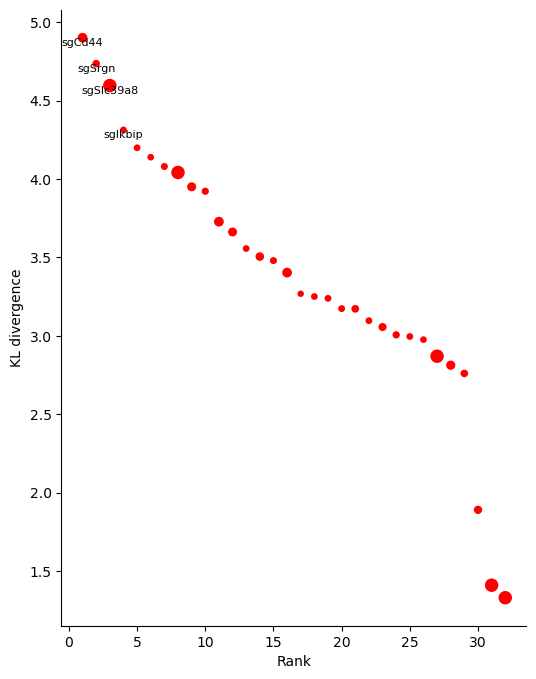

In [249]:
pdf = df_base.loc[:, ~df_base.columns.astype(str).str.contains('rank')].mean(axis=1, skipna=True)
pdf = pd.concat([pdf, df_base['rank_mean'], p_df], axis=1)
pdf = pdf[pdf.index != 'sgPomt1']
pdf.columns = ['KL divergence', 'Rank', 'p_value']
pdf['Rank'] = pdf.loc[:, 'KL divergence'].rank(ascending=False)

plt.figure(figsize=(6, 8))
sns.scatterplot(pdf, y='KL divergence', x='Rank',
                s=-np.log10(pdf.loc[pdf.index != 'sgnon-targeting', 'p_value'].astype(float) + 2e-4) * 20 + 20,
                edgecolor='none', color='red')
for i, row in pdf.iterrows():
    if row['KL divergence'] > 4.2:
        plt.text(y=row['KL divergence'], x=row['Rank'], s=i, fontsize=8, alpha=1, ha='center', va='top', rotation=0)
sns.despine()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./KL_divergence_rank.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [244]:
pdf = df_base.loc[:, ~df_base.columns.astype(str).str.contains('rank')].mean(axis=1, skipna=True)
pdf = pd.concat([pdf, df_base['rank_mean'], p_df], axis=1)
# pdf = pdf[pdf.index != 'sgPomt1']
pdf.columns = ['KL divergence', 'Rank', 'p_value']
pdf['Rank'] = pdf.loc[:, 'KL divergence'].rank(ascending=False)
pdf.sort_values('Rank', ascending=True).to_csv('./KL_divergence_rank.csv', index=True)

In [4]:
from tqdm import tqdm
from numba import jit
import numpy as np
from multiprocessing import Pool
import functools

N_PERMUTE = [100, 200, 500, 1000] # Removed larger permutation counts that caused memory issues

@jit(nopython=True)
def _kl_divergence(pk, qk):
    """Compute KL divergence between two probability distributions"""
    return np.sum(np.where(pk > 0, pk * (np.log(pk) - np.log(qk)), 0))

@jit(nopython=True) 
def permute_guide_bins(guide_matrix, idx_guide, idx_ntc):
    """Permute guide and non-targeting control bins"""
    t_bins = np.ones(guide_matrix.shape[0], dtype=np.bool_)
    guide_vec = guide_matrix[t_bins, idx_guide].copy()
    ntc_vec = guide_matrix[t_bins, idx_ntc].copy()

    swap_mask = np.random.randn(len(guide_vec)) < -2
    
    temp = guide_vec[swap_mask]
    guide_vec[swap_mask] = ntc_vec[swap_mask]
    ntc_vec[swap_mask] = temp
    
    ret_guide_vec = guide_matrix[:, idx_guide].copy()
    ret_ntc_vec = guide_matrix[:, idx_ntc].copy()
    ret_guide_vec[t_bins] = guide_vec
    ret_ntc_vec[t_bins] = ntc_vec
    
    return ret_guide_vec, ret_ntc_vec

def process_permutation(_, gdata, df_base):
    entro = {}
    for marker in gdata.obs.marker.unique():
        pdata = gdata[gdata.obs.marker == marker].copy()
        # eps = 1 / pdata[:, 'sgnon-targeting'].X.flatten().sum()
        eps = 1e-32
        guide_matrix = pdata.X.copy()
        idx_ntc = gdata.var.index.get_loc('sgnon-targeting')
        entro[marker] = {}
        for guide in gdata.var_names:
            if pdata[:, guide].X.sum() == 0:
                entro[marker][guide] = np.nan
                continue
            if guide != 'sgnon-targeting':
                idx_guide = gdata.var.index.get_loc(guide)
                guide_vec, ntc_vec = permute_guide_bins(guide_matrix.astype(np.float64), idx_guide, idx_ntc)
                
                qk_guide = ntc_vec / ntc_vec.sum()
                qk_guide = qk_guide + eps

                pk_guide = guide_vec / guide_vec.sum()
                pk_guide = pk_guide + eps
                entro[marker][guide] = _kl_divergence(pk_guide / pk_guide.sum(), qk_guide / qk_guide.sum())
                
    df = pd.DataFrame(entro)
    for col in df.columns:
        non_nan_mask = df[col].notna()
        df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
        df.loc[~non_nan_mask, col + '_rank'] = np.nan

    rank_cols = df.columns[df.columns.str.endswith('rank')]
    df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)
    df['rank'] = df['rank_mean'].rank(ascending=True)
    
    result = {}
    for guide in gdata.var_names:
        if guide != 'sgnon-targeting':
            result[guide] = df.loc[guide, 'rank']
    return result

    # result = {}
    # for guide in gdata.var_names:
    #     if guide != 'sgnon-targeting':
    #         result[guide] = 1 if df.loc[guide, 'rank_mean'] < df_base.loc[guide, 'rank_mean'] else 0
    # return result

s = {}
for n_perm in N_PERMUTE:
    with Pool(50) as pool: # Reduced number of processes to avoid memory issues
        process_func = functools.partial(process_permutation, gdata=gdata, df_base=df_base)
        results = list(tqdm(pool.imap(process_func, range(n_perm)), total=n_perm))
            
    s[n_perm] = {}
    for guide in gdata.var_names:
        if guide != 'sgnon-targeting':
            s[n_perm][guide] = []
    for i in range(n_perm):
        for guide in gdata.var_names:
            if guide != 'sgnon-targeting':
                s[n_perm][guide].append(results[i][guide])

  1%|          | 2/200 [00:08<12:33,  3.81s/it]/tmp/ipykernel_59813/743004368.py:54: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
 90%|█████████ | 180/200 [00:52<00:06,  3.08it/s]/tmp/ipykernel_59813/743004368.py:54: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
 67%|██████▋   | 334/500 [01:48<01:07,  2.47it/s]/tmp/ipykernel_59813/743004368.py:54: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
  3%|▎         | 29/1000 [00:13<02:53,  5.59it/s] /tmp/ipykernel_59813/743004368.py:54: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
 75%|███████▌  | 752/1000 [04:05<01:32,  2.69it/s]/tmp/ipykernel_59813/743004368.py:54: RuntimeWarning: invalid value encountered in divide
  pk_guide = guide_vec / guide_vec.sum()
 76%|███████▌  | 759/1000 [04:07<01:20,  2.99it/s]/tmp/ipykernel_59813/743004368.py:54: RuntimeWarni

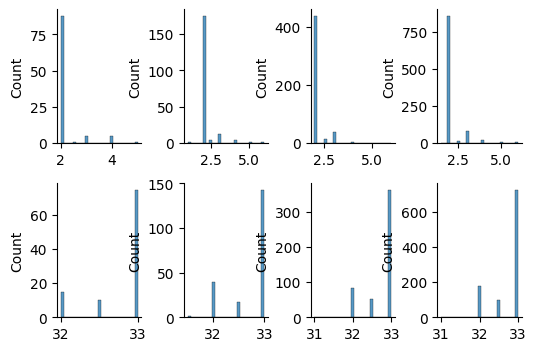

In [5]:
_, ax = plt.subplots(2, 4, figsize=(6, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
n_perms = [100, 200, 500, 1000]
permute_times = ['500', '1000', '5000', '10000']
for i, n_perm in enumerate(n_perms):
    # if n_perm == 100: continue
    for guide in gdata.var_names:
        if guide == 'sgCd44':
            sns.histplot(s[n_perm][guide], label=f'{n_perm} permutations', ax=ax[0, i], bins=25, line_kws={'width': 0})
        if guide == 'sgAqp3':
            sns.histplot(s[n_perm][guide], label=f'{n_perm} permutations', ax=ax[1, i], bins=25)
    # ax[i].legend()
sns.despine()
# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('../20240822-Pipeline/supplementary_images/KL_n_permutations.pdf', bbox_inches='tight', format='pdf')
plt.show()

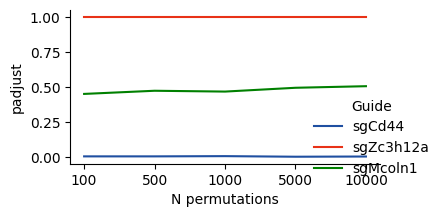

In [33]:
plt.figure(figsize=(4, 2))
plot_df = pd.DataFrame({'sgCd44': sgCd44, 'sgZc3h12a': sgZc3h12a, 'sgMcoln1': sgMcoln1}).melt(ignore_index=False).reset_index()
plot_df['bin_size'] = N_PERMUTE * 3
# plot_df.value = np.log2(plot_df.value)
sns.lineplot(data=plot_df, x='bin_size', y='value', hue='variable', palette=['#1f4fa1', '#e83217', '#008000'], errorbar='ci')
sns.despine()
plt.legend(title='Guide', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 0.5))
plt.xticks([200, 400, 600, 800, 1000], ['100', '500', '1000', '5000', '10000'])
plt.xlabel('N permutations')
plt.ylabel('padjust')
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/KL_n_permutations.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [37]:
p_df = pd.DataFrame(p_guide, index=['p_value'])
p_df = p_df / N_PERMUTE
p_df = p_df.T

plot_df = df_base.loc[:, ~df_base.columns.str.contains('rank')].melt(ignore_index=False).reset_index()
order = df_base['rank_mean'].sort_values().index
plt.figure(figsize=(3,4))

for i, marker in enumerate(order):
    marker_data = plot_df[plot_df['index'] == marker]
    mean_val = marker_data['value'].mean()
    std_val = marker_data['value'].std()
    p_value = p_df.loc[marker, 'p_value']
    if p_value > 0:  # Only plot if p-value is greater than 0
        plt.scatter(i, mean_val, color='black', s=-np.log10(p_value) * 10)
        if mean_val > 4.5:  # Only plot if p-value is greater than 0
            plt.text(i, mean_val, marker, color='black', ha='center', va='bottom')

plt.xlabel('Guide')
plt.ylabel('KL divergence')
sns.despine()

plt.rcParams['pdf.fonttype'] = 42

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./permute_kl.pdf', format='pdf', bbox_inches='tight')
plt.show()

NameError: name 'df_base' is not defined

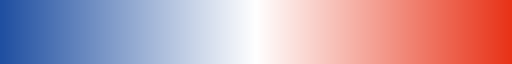

In [8]:
from types import new_class
from matplotlib.colors import LinearSegmentedColormap

colors = ['#1f4fa1', '#ffffff', '#e83217']
n_bins = 256
new_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=n_bins)
new_cmap

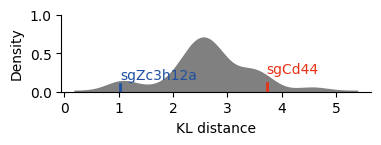

In [14]:
from statsmodels.nonparametric.kde import KDEUnivariate

# 初始化KDE估计器
perm_df = pd.DataFrame(entro.values(), index=entro.keys())
perm_df['KL distance'] = perm_df[0]
kde = KDEUnivariate(perm_df['KL distance'])

# 拟合数据
kde.fit()

# 绘制KDE曲线
plt.figure(figsize=(4, 1))
# plt.xlim(0, 1)
plt.ylim(0, 1)

for gene, color in zip(['sgZc3h12a', 'sgCd44'], new_cmap(np.linspace(0, 1, 2))):
    if gene in perm_df.index:
        pos = perm_df.loc[gene, 'KL distance']
        plt.vlines(x=pos, ymin=0, ymax=kde.density[np.abs(kde.support - pos).argmin()], color=color, linestyles='--',
                   alpha=1, linewidth=2)
        plt.text(pos, kde.density[np.abs(kde.support - pos).argmin()], gene, color=color, rotation=0, ha='left', va='bottom')

plt.fill_between(kde.support, kde.density, alpha=1, color='gray')
plt.plot(kde.support, kde.density, color='gray')

plt.xlabel('KL distance')
plt.ylabel('Density') 
sns.despine()

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('../20240822-Pipeline/supplementary_images/KL_distance_kde.pdf',
            # bbox_inches='tight', format='pdf')
plt.show()

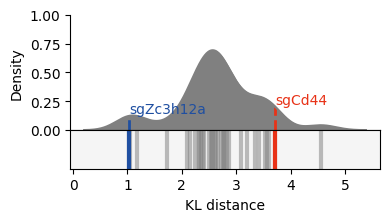

In [43]:
from statsmodels.nonparametric.kde import KDEUnivariate

# 初始化KDE估计器
perm_df = pd.DataFrame(entro_dict.values(), index=entro_dict.keys())
perm_df['KL distance'] = perm_df[0]
kde = KDEUnivariate(perm_df['KL distance'])

# 拟合数据
kde.fit()

# 绘制KDE曲线
fig, ax = plt.subplots(2, 1, figsize=(4, 2), sharex=False, height_ratios=[3, 1], gridspec_kw={'hspace': 0})
# plt.xlim(0, 1)
ax[0].set_ylim(0, 1)

for gene, color in zip(['sgZc3h12a', 'sgCd44'], new_cmap(np.linspace(0, 1, 2))):
    if gene in perm_df.index:
        pos = perm_df.loc[gene, 'KL distance']
        ax[0].vlines(x=pos, ymin=0, ymax=kde.density[np.abs(kde.support - pos).argmin()], color=color, linestyles='--',
                   alpha=1, linewidth=2)
        ax[0].text(pos, kde.density[np.abs(kde.support - pos).argmin()], gene, color=color, rotation=0, ha='left', va='bottom')

ax[0].fill_between(kde.support, kde.density, alpha=1, color='gray')
ax[0].plot(kde.support, kde.density, color='gray')

lim = ax[0].get_xlim()

ax[0].set_xlabel('')
ax[0].set_xticks([])
ax[0].set_ylabel('Density')
sns.despine(ax=ax[0])

for row in perm_df.iterrows():
    # print(row)
    ax[1].vlines(x=row[1], ymin=0, ymax=1, color='gray', linestyles='-',
               alpha=0.3, linewidth=3)
for gene, color in zip(['sgZc3h12a', 'sgCd44'], new_cmap(np.linspace(0, 1, 2))):
    if gene in perm_df.index:
        pos = perm_df.loc[gene, 'KL distance']
        ax[1].vlines(x=pos, ymin=0, ymax=1, color=color, linestyles='-',
                   alpha=1, linewidth=3)

ax[1].set_facecolor('whitesmoke')
ax[1].set_ylim(0, 1)
ax[1].set_xlim(lim)
ax[1].set_xlabel('KL distance')
ax[1].set_ylabel('')
ax[1].set_yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/KL_distance_kde.pdf',
            bbox_inches='tight', format='pdf')
plt.show()

In [46]:
from scipy.stats import wasserstein_distance
import statsmodels.api as sm
from tqdm import tqdm

bins = [5, 10, 15, 20]
plot_df = pd.DataFrame()
for i in range(3):
    kde_dict = {}
    plot_df = pd.DataFrame()
    for n_bins in bins:
        kde_dict[n_bins] = {}
        x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), n_bins)
        y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), n_bins)

        for guide in tqdm(gdata.var_names):
            if guide != 'sgCd44' and guide != 'sgZc3h12a' and guide != 'sgnon-targeting': continue
            cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max() + 1.5, 0.5)

            X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

            kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                                        plot_data.obsm['spatial'][:, 1],
                                                        plot_data[:, guide].X.flatten()],
                                var_type='cco',  # 'c' for continuous
                                bw='normal_reference')  # 使用默认的带宽选择方法

            grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])
            kde_values = kde.pdf(grid_coords).reshape(X.shape)
            kde_matrix = np.zeros((kde_values.shape[0], kde_values.shape[1]))
            for i in range(kde_values.shape[2]):
                kde_matrix += kde_values[:, :, i] * cnt_grid[i]
            kde_dict[n_bins][guide] = kde_matrix
    cd44_wasserstein_dict = {}
    zc3h12a_wasserstein_dict = {}
    for n_bins in tqdm(bins):
        # Flatten the 2D arrays to 1D for wasserstein distance calculation
        ntc_flat = kde_dict[n_bins]['sgnon-targeting'].flatten()
        guide_flat = kde_dict[n_bins]['sgCd44'].flatten()
        cd44_wasserstein_dict[n_bins] = (wasserstein_distance(ntc_flat, guide_flat))

        ntc_flat = kde_dict[n_bins]['sgnon-targeting'].flatten()
        guide_flat = kde_dict[n_bins]['sgZc3h12a'].flatten()
        zc3h12a_wasserstein_dict[n_bins] = (wasserstein_distance(ntc_flat, guide_flat))
    pdf = pd.DataFrame({
        'sgCd44': [cd44_wasserstein_dict[n_bins] for n_bins in bins],
        'sgZc3h12a': [zc3h12a_wasserstein_dict[n_bins] for n_bins in bins]
    }, index=bins).melt(ignore_index=False).reset_index()
    print(pdf)
    plot_df = pd.concat([plot_df, pdf], axis=0)

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 87.67it/s]


   index   variable         value
0      5     sgCd44  3.414211e-10
1     10     sgCd44  4.325612e-10
2     15     sgCd44  4.585474e-10
3     20     sgCd44  4.709229e-10
4      5  sgZc3h12a  3.079489e-10
5     10  sgZc3h12a  3.940143e-10
6     15  sgZc3h12a  4.176445e-10
7     20  sgZc3h12a  4.288147e-10


100%|██████████| 4/4 [00:00<00:00, 3656.76it/s]


   index   variable         value
0      5     sgCd44  3.414211e-10
1     10     sgCd44  4.325612e-10
2     15     sgCd44  4.585474e-10
3     20     sgCd44  4.709229e-10
4      5  sgZc3h12a  3.079489e-10
5     10  sgZc3h12a  3.940143e-10
6     15  sgZc3h12a  4.176445e-10
7     20  sgZc3h12a  4.288147e-10


100%|██████████| 4/4 [00:00<00:00, 3365.54it/s]

   index   variable         value
0      5     sgCd44  3.414211e-10
1     10     sgCd44  4.325612e-10
2     15     sgCd44  4.585474e-10
3     20     sgCd44  4.709229e-10
4      5  sgZc3h12a  3.079489e-10
5     10  sgZc3h12a  3.940143e-10
6     15  sgZc3h12a  4.176445e-10
7     20  sgZc3h12a  4.288147e-10


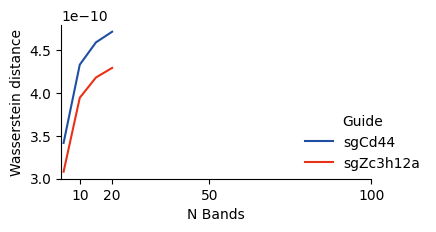

In [177]:
plt.figure(figsize=(4, 2))
sns.lineplot(data=plot_df, x='index', y='value', hue='variable', palette=['#1f4fa1', '#e83217'], errorbar='ci')
sns.despine()
plt.legend(title='Guide', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 0.5))
plt.xticks([10, 20, 50, 100], ['10', '20', '50', '100'])
plt.xlabel('N Bands')
plt.ylabel('Wasserstein distance')
# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('../20240822-Pipeline/supplementary_images/KL_n_bands.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [96]:
from scipy.stats import wasserstein_distance
import statsmodels.api as sm
from tqdm import tqdm

plot_data = gdata[gdata.obs.marker == '2-1']

kde_dict = {}
bins = [20]
plot_df = pd.DataFrame()
for n_bins in bins:
    kde_dict[n_bins] = {}
    x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), n_bins)
    y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), n_bins)

    for guide in tqdm(gdata.var_names):
        # if guide != 'sgCd44' and guide != 'sgZc3h12a' and guide != 'sgnon-targeting': continue
        cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max() + 1.5, 0.5)

        X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

        kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                                    plot_data.obsm['spatial'][:, 1],
                                                    plot_data[:, guide].X.flatten()],
                            var_type='cco',  # 'c' for continuous
                            bw='normal_reference')  # 使用默认的带宽选择方法

        grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])
        kde_values = kde.pdf(grid_coords).reshape(X.shape)
        kde_matrix = np.zeros((kde_values.shape[0], kde_values.shape[1]))
        for i in range(kde_values.shape[2]):
            kde_matrix += kde_values[:, :, i] * cnt_grid[i]
        kde_dict[n_bins][guide] = kde_matrix

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 34/34 [01:43<00:00,  3.06s/it]


In [97]:
from scipy.stats import wasserstein_distance

wasserstein_dict = {}
for guide in tqdm(gdata.var_names):
    # Flatten the 2D arrays to 1D for wasserstein distance calculation
    ntc_flat = kde_dict[20]['sgnon-targeting'].flatten()
    guide_flat = kde_dict[20][guide].flatten()
    wasserstein_dict[guide] = wasserstein_distance(ntc_flat, guide_flat)
wasserstein_dict

100%|██████████| 34/34 [00:00<00:00, 2966.39it/s]


{'sgAdrb2': 3.8128868388126094e-10,
 'sgAqp3': 2.6898093851001345e-10,
 'sgArntl': 4.054755549919842e-10,
 'sgCd44': 4.709229192605003e-10,
 'sgCd52': 3.9773087792034445e-10,
 'sgCxcl16': 2.6416154076479386e-10,
 'sgDdit3': 3.233247152767336e-10,
 'sgErgic2': 3.921079778014259e-10,
 'sgFbxo7': 2.8546044717205473e-10,
 'sgFlot1': 2.882227579854763e-10,
 'sgGata3': 1.3603105316897198e-10,
 'sgGlb1l2': 3.7391712146235025e-10,
 'sgGpa33': 3.5719842383423046e-10,
 'sgIkbip': 3.895410059720485e-10,
 'sgKcna3': 4.2301914613923586e-10,
 'sgKlrd1': 3.8608360869907953e-10,
 'sgL3mbtl3': 4.047971807322687e-10,
 'sgMark3': 3.353644208578217e-10,
 'sgMcoln1': 3.859309008417388e-10,
 'sgNmb': 4.039129251980588e-10,
 'sgPiezo1': 4.0915052870182917e-10,
 'sgPomt1': 4.917562550820547e-10,
 'sgPpia': 2.1154432985367488e-10,
 'sgS100a11': 3.9907575065074296e-10,
 'sgScamp4': 2.5204697562138463e-10,
 'sgSlc39a8': 3.94006041689237e-10,
 'sgSorl1': 2.466825160824429e-10,
 'sgSrgn': 4.3297801703806553e-10,
 

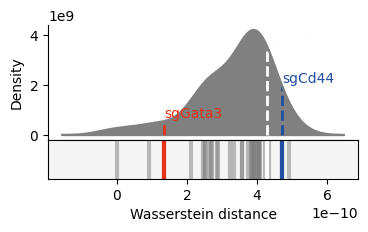

In [132]:
from statsmodels.nonparametric.kde import KDEUnivariate

# 初始化KDE估计器
perm_df = pd.DataFrame(wasserstein_dict.values(), index=wasserstein_dict.keys())
perm_df['Wasserstein distance'] = perm_df[0]
kde = KDEUnivariate(perm_df['Wasserstein distance'])

guide_list = ['sgCd44', 'sgZc3h12a', 'sgGata3']

# 拟合数据
kde.fit()

# 绘制KDE曲线
fig, ax = plt.subplots(2, 1, figsize=(4, 2), sharex=False, height_ratios=[3, 1], gridspec_kw={'hspace': 0})
# ax[0].set_xlim(0, 7e-10)
# ax[0].set_ylim(0, 5e9)

for gene, color in zip(guide_list, new_cmap(np.linspace(0, 1, len(guide_list)))):
    if gene in perm_df.index:
        pos = perm_df.loc[gene, 'Wasserstein distance']
        ax[0].vlines(x=pos, ymin=0, ymax=kde.density[np.abs(kde.support - pos).argmin()], color=color, linestyles='--',
                   alpha=1, linewidth=2)
        ax[0].text(pos, kde.density[np.abs(kde.support - pos).argmin()], gene, color=color, rotation=0, ha='left', va='bottom')

ax[0].fill_between(kde.support, kde.density, alpha=1, color='gray')
ax[0].plot(kde.support, kde.density, color='gray')

lim = ax[0].get_xlim()

ax[0].set_xlabel('')
ax[0].set_xticks([])
ax[0].set_ylabel('Density')
sns.despine(ax=ax[0])

for row in perm_df.iterrows():
    # print(row)
    ax[1].vlines(x=row[1], ymin=0, ymax=1, color='gray', linestyles='-',
               alpha=0.3, linewidth=3)
for gene, color in zip(guide_list, new_cmap(np.linspace(0, 1, len(guide_list)))):
    if gene in perm_df.index:
        pos = perm_df.loc[gene, 'Wasserstein distance']
        ax[1].vlines(x=pos, ymin=0, ymax=1, color=color, linestyles='-',
                   alpha=1, linewidth=3)

ax[1].set_facecolor('whitesmoke')
ax[1].set_ylim(0, 1)
ax[1].set_xlim(lim)
ax[1].set_xlabel('Wasserstein distance')
ax[1].set_ylabel('')
ax[1].set_yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/Wasserstein_distance_kde.pdf',
            bbox_inches='tight', format='pdf')
plt.show()

# Other datasets

In [78]:
p = []
bin_width = 20
bins = [bin_width]
for marker in gdata.obs.marker.cat.categories:
    plot_data = gdata[gdata.obs.marker == marker]
    from scipy.stats import entropy

    entro_dict = {}
    entro_data = plot_data[plot_data.X.sum(axis=1) > 0].copy()

    # ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
    ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
    for i in plot_data.var_names:
        # if i == 'sgnon-targeting': continue
        guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
        entro_dict[i] = entropy(guide_vec, ntc_vec)

    kde_dict = {}
    plot_df = pd.DataFrame()
    for n_bins in bins:
        kde_dict[n_bins] = {}
        x_grid = np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), n_bins)
        y_grid = np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), n_bins)

        for guide in tqdm(gdata.var_names):
            # if guide != 'sgCd44' and guide != 'sgZc3h12a' and guide != 'sgnon-targeting': continue
            cnt_grid = np.arange(plot_data[:, guide].X.min(), plot_data[:, guide].X.max() + 1.5, 0.5)

            X, Y, CNT = np.meshgrid(x_grid, y_grid, cnt_grid)

            kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                                        plot_data.obsm['spatial'][:, 1],
                                                        plot_data[:, guide].X.flatten()],
                                var_type='cco',  # 'c' for continuous
                                bw='normal_reference')  # 使用默认的带宽选择方法

            grid_coords = np.column_stack([X.ravel(), Y.ravel(), CNT.ravel()])
            kde_values = kde.pdf(grid_coords).reshape(X.shape)
            kde_matrix = np.zeros((kde_values.shape[0], kde_values.shape[1]))
            for i in range(kde_values.shape[2]):
                kde_matrix += kde_values[:, :, i] * cnt_grid[i]
            kde_dict[n_bins][guide] = kde_matrix
    wasserstein_dict = {}
    for guide in tqdm(gdata.var_names):
        # Flatten the 2D arrays to 1D for wasserstein distance calculation
        ntc_flat = kde_dict[bin_width]['sgnon-targeting'].flatten()
        guide_flat = kde_dict[bin_width][guide].flatten()
        wasserstein_dict[guide] = wasserstein_distance(ntc_flat, guide_flat)
    wasserstein_dict
    p += [pd.concat([pd.DataFrame(wasserstein_dict, index=['Wasserstein distance']), pd.DataFrame(entro_dict, index=['entropy'])], axis=0).fillna(0).T.corr(method='spearman').iloc[0, 1]]

/tmp/ipykernel_69946/2918066876.py:15: RuntimeWarning: invalid value encountered in divide
  guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
100%|██████████| 34/34 [00:00<00:00, 10501.20it/s]
/tmp/ipykernel_69946/2918066876.py:15: RuntimeWarning: invalid value encountered in divide
  guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
100%|██████████| 34/34 [00:00<00:00, 8293.48it/s]


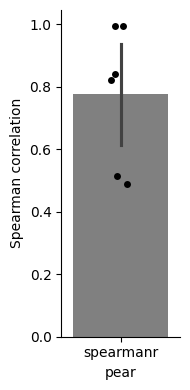

In [82]:
# 将pearson_r转换为DataFrame以便绘图
pearson_df = pd.DataFrame({'correlation': p})
pearson_df['pear'] = 'spearmanr'

plt.figure(figsize=(2, 4))
sns.barplot(pearson_df, x='pear', y='correlation', color='gray', width=0.8)
# 添加swarm散点图
sns.stripplot(data=pearson_df, y='correlation', x='pear', color='black', jitter=0.2)

plt.ylabel("Spearman correlation")
# plt.title("Correlation between permutation\nand chi-square ranks")
sns.despine()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/wasserstein_kl_correlation.pdf',
            bbox_inches='tight', format='pdf')
plt.show()


# Correlation

In [38]:
from sklearn.isotonic import spearmanr


perm_df = pd.DataFrame(entro_dict.values(), index=entro_dict.keys())
perm_df['KL distance'] = perm_df[0]
perm_df['Wasserstein distance'] = wasserstein_dict.values()

spearmanr(perm_df['KL distance'], perm_df['Wasserstein distance'])

SignificanceResult(statistic=0.6932009167303286, pvalue=5.510745476117996e-06)

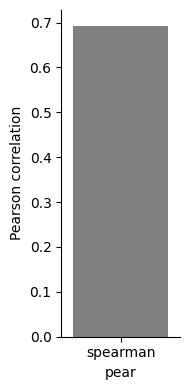

In [41]:
# 将pearson_r转换为DataFrame以便绘图
pearson_df = pd.DataFrame({'correlation': spearmanr(perm_df['KL distance'], perm_df['Wasserstein distance']).correlation}, index=['spearman'])
pearson_df['pear'] = 'spearman'

plt.figure(figsize=(2, 4))
sns.barplot(pearson_df, x='pear', y='correlation', color='gray', width=0.8)
# 添加swarm散点图
# sns.stripplot(data=pearson_df, y='correlation', x='pear', color='black', jitter=0.2)

plt.ylabel("Pearson correlation")
# plt.title("Correlation between permutation\nand chi-square ranks")
sns.despine()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/KL_Wasserstein_correlation.pdf',
            bbox_inches='tight', format='pdf')
plt.show()


# Main Figure

/tmp/ipykernel_38328/376708763.py:17: RuntimeWarning: invalid value encountered in divide
  guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
/tmp/ipykernel_38328/376708763.py:17: RuntimeWarning: invalid value encountered in divide
  guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()


IndexError: index 0 is out of bounds for axis 0 with size 0

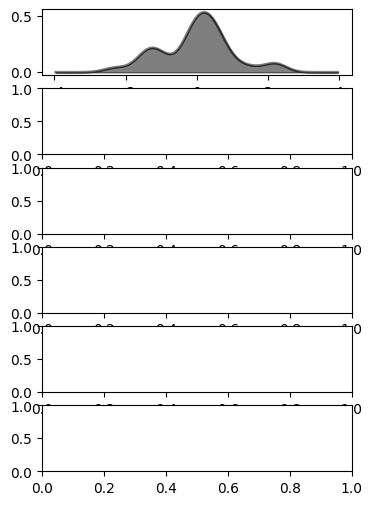

In [11]:
import scipy.sparse

entro_dict = {}
plot_df = pd.DataFrame()
if type(gdata.X) == scipy.sparse.csr_matrix:
    gdata.X = gdata.X.toarray()

for marker in gdata.obs.marker.cat.categories:

    entro_dict[marker] = {}
    entro_data = gdata[(gdata.obs.marker == marker) & (gdata.X.sum(axis=1) > 0)].copy()

    # ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
    ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
    for i in gdata.var_names:
        # if i == 'sgnon-targeting': continue
        guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
        entro_dict[marker][i] = entropy(guide_vec, ntc_vec)

    plot_df_i = pd.DataFrame(entro_dict[marker], index=['entropy']).T.sort_values(by='entropy', ascending=False)
    plot_df_i['z_score'] = (plot_df_i['entropy'] - np.mean(plot_df_i['entropy'])) / np.std(plot_df_i['entropy'])
    plot_df_i['marker'] = marker

    plot_df = pd.concat([plot_df, plot_df_i])

from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

_, ax = plt.subplots(6, 1, figsize=(4, 6), sharex=False, sharey=False)

for i, marker in enumerate(plot_df['marker'].unique()):
    # 计算高斯平滑后的分布
    hist, bins = np.histogram(plot_df.loc[plot_df['marker'] == marker, 'z_score'], bins=100, density=True, range=(-4, 4))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    smoothed = gaussian_filter1d(hist, sigma=4)

    ax[i].plot(bin_centers, smoothed, 'k-', lw=2, fillstyle='full', alpha=0.5)
    ax[i].fill_between(bin_centers, smoothed, color='k', alpha=0.5)

    # 添加sgCd44的竖线标记
    cd44_1_zscore = plot_df.loc[(plot_df['marker'] == marker) & ((plot_df.index == 'sgCd44_1_gene')), 'z_score'].values[0]
    cd44_2_zscore = plot_df.loc[(plot_df['marker'] == marker) & ((plot_df.index == 'sgCd44_2_gene')), 'z_score'].values[0]
    print(cd44_1_zscore, cd44_2_zscore)
    ax[i].vlines(x=cd44_1_zscore, ymin=0, ymax=(cd44_1_zscore + 4) * 100 // 8,
                color='tomato', linestyle='-', label='sgCd44', linewidth=3)
    ax[i].vlines(x=cd44_2_zscore, ymin=0, ymax=(cd44_2_zscore + 4) * 100 // 8,
                color='skyblue', linestyle='-', label='sgCd44', linewidth=3)
    ax[i].set_ylabel('')
    ax[i].set_yticks([])
    if i == 5:
        ax[i].set_xlabel('KL distance z_score')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    ax[i].set_ylim(0, np.max(smoothed) + 0.05)

    sns.despine(left=True, bottom=True, ax=ax[i])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/KL_distance_zscore.pdf', bbox_inches='tight')
plt.show()


-0.5523430593142684
2.591916575205338
-0.4143377188001489
0.8377678044853963
1.1826999613446771
2.0331546839475525


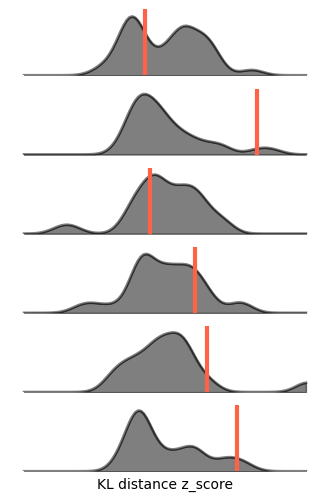

In [11]:
import scipy.sparse

entro_dict = {}
plot_df = pd.DataFrame()
if type(gdata.X) == scipy.sparse.csr_matrix:
    gdata.X = gdata.X.toarray()

for marker in gdata.obs.marker.cat.categories:

    entro_dict[marker] = {}
    entro_data = gdata[(gdata.obs.marker == marker) & (gdata.X.sum(axis=1) > 0)].copy()

    # ntc_vec = entro_data[:, 'sgnon-targeting'].X.toarray().flatten()
    ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()
    for i in gdata.var_names:
        # if i == 'sgnon-targeting': continue
        guide_vec = entro_data[:, i].X.toarray().flatten() / entro_data[:, i].X.sum()
        entro_dict[marker][i] = entropy(guide_vec, ntc_vec)

    plot_df_i = pd.DataFrame(entro_dict[marker], index=['entropy']).T.sort_values(by='entropy', ascending=False)
    plot_df_i['z_score'] = (plot_df_i['entropy'] - np.mean(plot_df_i['entropy'])) / np.std(plot_df_i['entropy'])
    plot_df_i['marker'] = marker

    plot_df = pd.concat([plot_df, plot_df_i])

from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

_, ax = plt.subplots(6, 1, figsize=(4, 6), sharex=False, sharey=False)

for i, marker in enumerate(plot_df['marker'].unique()):
    # 计算高斯平滑后的分布
    hist, bins = np.histogram(plot_df.loc[plot_df['marker'] == marker, 'z_score'], bins=100, density=True, range=(-4, 4))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    smoothed = gaussian_filter1d(hist, sigma=4)

    ax[i].plot(bin_centers, smoothed, 'k-', lw=2, fillstyle='full', alpha=0.5)
    ax[i].fill_between(bin_centers, smoothed, color='k', alpha=0.5)

    # 添加sgCd44的竖线标记
    cd44_1_zscore = plot_df.loc[(plot_df['marker'] == marker) & ((plot_df.index == 'sgCd44')), 'z_score'].values[0]
    print(cd44_1_zscore)
    ax[i].vlines(x=cd44_1_zscore, ymin=0, ymax=(cd44_1_zscore + 4) * 100 // 8,
                color='tomato', linestyle='-', label='sgCd44', linewidth=3)
    ax[i].set_ylabel('')
    ax[i].set_yticks([])
    if i == 5:
        ax[i].set_xlabel('KL distance z_score')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    ax[i].set_ylim(0, np.max(smoothed) + 0.05)

    sns.despine(left=True, bottom=True, ax=ax[i])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/KL_distance_zscore.pdf', bbox_inches='tight')
plt.show()


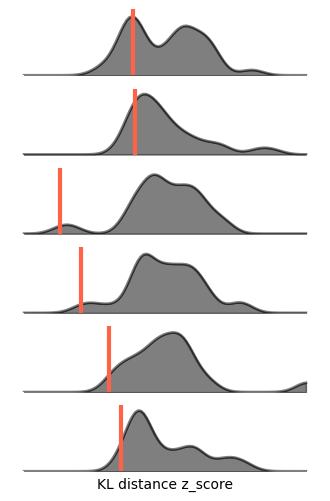

In [12]:
_, ax = plt.subplots(6, 1, figsize=(4, 6), sharex=False, sharey=False)

for i, marker in enumerate(plot_df['marker'].unique()):
    # 计算高斯平滑后的分布
    hist, bins = np.histogram(plot_df.loc[plot_df['marker'] == marker, 'z_score'], bins=100, density=True, range=(-4, 4))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    smoothed = gaussian_filter1d(hist, sigma=4)

    ax[i].plot(bin_centers, smoothed, 'k-', lw=2, fillstyle='full', alpha=0.5)
    ax[i].fill_between(bin_centers, smoothed, color='k', alpha=0.5)

    # 添加sgCd44的竖线标记
    cd44_1_zscore = plot_df.loc[(plot_df['marker'] == marker) & ((plot_df.index == 'sgZc3h12a')), 'z_score'].values[0]
    ax[i].vlines(x=cd44_1_zscore, ymin=0, ymax=(cd44_1_zscore + 4) * 100 // 8,
                color='tomato', linestyle='-', label='sgZc3h12a', linewidth=3)
    ax[i].set_ylabel('')
    ax[i].set_yticks([])
    if i == 5:
        ax[i].set_xlabel('KL distance z_score')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    ax[i].set_ylim(0, np.max(smoothed) + 0.05)

    sns.despine(left=True, bottom=True, ax=ax[i])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/KL_distance_zscore_Zc3h12a_combined.pdf', bbox_inches='tight')
plt.show()

In [102]:
from tqdm import tqdm
from multiprocessing import Pool

expr_matrix = entro_data.X.copy()
ntc_vec = entro_data.X.sum(axis=1).flatten() / entro_data.X.sum(axis=1).sum()

freq_dict = {}
N_PERMUTE = 1000

def compute_permutation_entropy(args):
    idx_guide, ntc_vec, expr_matrix, entro_dict_i = args
    permute_vec = permute_guide_bins(expr_matrix, idx_guide, shuffle_rate=0.1)
    permute_vec = permute_vec / permute_vec.sum()
    permute_entro = entropy(permute_vec, ntc_vec)
    return permute_entro > entro_dict_i

for i in gdata.var_names:
    if i == 'sgnon-targeting': continue
    idx_guide = entro_data.var.index.get_loc(i)
    with Pool() as pool:
        results = pool.map(compute_permutation_entropy, [(idx_guide, ntc_vec, expr_matrix, entro_dict[i]) for _ in tqdm(range(N_PERMUTE))])
    freq_dict[i] = sum(results) / N_PERMUTE
    print(i, freq_dict[i])
freq_dict

100%|██████████| 1000/1000 [00:00<00:00, 1448309.39it/s]


sgAdrb2 0.997


100%|██████████| 1000/1000 [00:00<00:00, 1078227.25it/s]


sgAqp3 0.997


100%|██████████| 1000/1000 [00:00<00:00, 1045439.68it/s]


sgArntl 0.071


100%|██████████| 1000/1000 [00:00<00:00, 926918.01it/s]


sgCd44 0.92


100%|██████████| 1000/1000 [00:00<00:00, 1309492.35it/s]


sgCd52 0.172


100%|██████████| 1000/1000 [00:00<00:00, 1348217.29it/s]


sgCxcl16 0.999


100%|██████████| 1000/1000 [00:00<00:00, 1605782.54it/s]


sgDdit3 0.016


100%|██████████| 1000/1000 [00:00<00:00, 709936.36it/s]


sgErgic2 0.705


100%|██████████| 1000/1000 [00:00<00:00, 514891.23it/s]


sgFbxo7 0.973


100%|██████████| 1000/1000 [00:00<00:00, 1002462.72it/s]


sgFlot1 0.988


100%|██████████| 1000/1000 [00:00<00:00, 1911715.59it/s]


sgGata3 1.0


100%|██████████| 1000/1000 [00:00<00:00, 1146297.90it/s]


sgGlb1l2 0.745


100%|██████████| 1000/1000 [00:00<00:00, 1080171.00it/s]


sgGpa33 0.993


100%|██████████| 1000/1000 [00:00<00:00, 1166056.16it/s]


sgIkbip 0.995


100%|██████████| 1000/1000 [00:00<00:00, 1115803.14it/s]


sgKcna3 0.0


100%|██████████| 1000/1000 [00:00<00:00, 1090846.29it/s]


sgKlrd1 0.179


100%|██████████| 1000/1000 [00:00<00:00, 759700.05it/s]


sgL3mbtl3 0.083


100%|██████████| 1000/1000 [00:00<00:00, 655155.26it/s]


sgMark3 0.994


100%|██████████| 1000/1000 [00:00<00:00, 884314.57it/s]


sgMcoln1 1.0


100%|██████████| 1000/1000 [00:00<00:00, 513504.41it/s]


sgNmb 0.071


100%|██████████| 1000/1000 [00:00<00:00, 1032825.41it/s]


sgPiezo1 0.627


100%|██████████| 1000/1000 [00:00<00:00, 940216.10it/s]


sgPomt1 0.886


100%|██████████| 1000/1000 [00:00<00:00, 899486.17it/s]


sgPpia 0.082


100%|██████████| 1000/1000 [00:00<00:00, 956511.74it/s]


sgS100a11 0.97


100%|██████████| 1000/1000 [00:00<00:00, 474683.57it/s]


sgScamp4 0.2


100%|██████████| 1000/1000 [00:00<00:00, 1072712.02it/s]


sgSlc39a8 0.297


100%|██████████| 1000/1000 [00:00<00:00, 890888.70it/s]


sgSorl1 0.071


100%|██████████| 1000/1000 [00:00<00:00, 1034864.05it/s]


sgSrgn 0.829


100%|██████████| 1000/1000 [00:00<00:00, 997931.00it/s]


sgTmem64 0.445


100%|██████████| 1000/1000 [00:00<00:00, 514954.45it/s]


sgWipf1 0.13


100%|██████████| 1000/1000 [00:00<00:00, 825975.58it/s]


sgZc3h12a 1.0


100%|██████████| 1000/1000 [00:00<00:00, 786333.71it/s]


sgZhx2 0.842


100%|██████████| 1000/1000 [00:00<00:00, 694651.21it/s]


sgZscan12 0.006


{'sgAdrb2': 0.997,
 'sgAqp3': 0.997,
 'sgArntl': 0.071,
 'sgCd44': 0.92,
 'sgCd52': 0.172,
 'sgCxcl16': 0.999,
 'sgDdit3': 0.016,
 'sgErgic2': 0.705,
 'sgFbxo7': 0.973,
 'sgFlot1': 0.988,
 'sgGata3': 1.0,
 'sgGlb1l2': 0.745,
 'sgGpa33': 0.993,
 'sgIkbip': 0.995,
 'sgKcna3': 0.0,
 'sgKlrd1': 0.179,
 'sgL3mbtl3': 0.083,
 'sgMark3': 0.994,
 'sgMcoln1': 1.0,
 'sgNmb': 0.071,
 'sgPiezo1': 0.627,
 'sgPomt1': 0.886,
 'sgPpia': 0.082,
 'sgS100a11': 0.97,
 'sgScamp4': 0.2,
 'sgSlc39a8': 0.297,
 'sgSorl1': 0.071,
 'sgSrgn': 0.829,
 'sgTmem64': 0.445,
 'sgWipf1': 0.13,
 'sgZc3h12a': 1.0,
 'sgZhx2': 0.842,
 'sgZscan12': 0.006}

# benchmark PERMANOVA

In [3]:
# mdata = gdata[gdata.obs.marker == 'B926-1']
mdata = gdata
mdata.obs['cluster'] = fdata.obs.cluster_cellcharter_givenk.tolist()
c_df = pd.concat([pd.DataFrame(mdata.X, columns=mdata.var_names, index=mdata.obs_names), mdata.obs.cluster], axis=1)

In [4]:
guide = 'sgCd44'
n_bins = 10
df = pd.DataFrame(index=range(12))
g_df = c_df[[guide, "sgnon-targeting", "cluster"]]
guide_df = g_df.groupby(['cluster', guide]).count().unstack()['sgnon-targeting']
guide_cnts = df.copy()
choords = (np.linspace(0, guide_df.columns.max(), n_bins) + 0.5) // 1
for c in choords:
    guide_cnts = pd.concat([guide_cnts, guide_df[c]], axis=1).fillna(0)
guide_cnts

,0,0,0,1,1,1,1,2,2,2
0,9796.0,9796.0,9796.0,44.0,44.0,44.0,44.0,0.0,0.0,0.0
1,16071.0,16071.0,16071.0,124.0,124.0,124.0,124.0,2.0,2.0,2.0
2,13002.0,13002.0,13002.0,27.0,27.0,27.0,27.0,0.0,0.0,0.0
3,12079.0,12079.0,12079.0,309.0,309.0,309.0,309.0,6.0,6.0,6.0
4,8121.0,8121.0,8121.0,43.0,43.0,43.0,43.0,0.0,0.0,0.0
5,8566.0,8566.0,8566.0,16.0,16.0,16.0,16.0,0.0,0.0,0.0
6,5291.0,5291.0,5291.0,19.0,19.0,19.0,19.0,1.0,1.0,1.0
7,9418.0,9418.0,9418.0,48.0,48.0,48.0,48.0,0.0,0.0,0.0
8,6142.0,6142.0,6142.0,28.0,28.0,28.0,28.0,0.0,0.0,0.0
9,5369.0,5369.0,5369.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0


In [205]:
import warnings
from tqdm import tqdm
from skbio.stats.distance import permanova, DistanceMatrix
from scipy.spatial.distance import pdist, squareform
from scipy.stats import gaussian_kde
warnings.filterwarnings('ignore')

cd44_p_value = {}
zc3h12a_p_value = {}
plot_df = pd.DataFrame()
for i in range(3):
    for guide in tqdm(gdata.var_names):
        if guide != "sgCd44" and guide != "sgZc3h12a": continue
        for n_bins in [5, 10, 20, 50, 100]:
            g_df = c_df[[guide, "sgnon-targeting", "cluster"]]

            masks = {c: (g_df.cluster == c) for c in g_df.cluster.unique()}

            df = pd.DataFrame(index=range(12))
            g_df = c_df[[guide, "sgnon-targeting", "cluster"]]

            guide_df = g_df.groupby(['cluster', guide]).count().unstack()['sgnon-targeting']
            guide_cnts = df.copy()
            max_count = guide_df.columns.max()
            x_grid = np.linspace(0, max_count + 0.5, 10)
            guide_cnts = []
            for cluster in range(12):
                if cluster in guide_df.index:
                    counts = guide_df.loc[cluster].dropna()
                    kde = gaussian_kde(counts)
                    density = kde(x_grid)
                    density = density / density.sum()  # 归一化
                    guide_cnts.append(density)
                else:
                    guide_cnts.append(np.zeros_like(x_grid))
            guide_cnts = np.array(guide_cnts)

            ntc_df = g_df.groupby(['cluster', 'sgnon-targeting']).count().unstack()[guide]
            ntc_cnts = df.copy()
            max_count = ntc_df.columns.max()
            x_grid = np.linspace(0, max_count + 0.5, 10)
            
            ntc_cnts = []
            for cluster in range(12):
                if cluster in ntc_df.index:
                    counts = ntc_df.loc[cluster].dropna()
                    kde = gaussian_kde(counts)
                    density = kde(x_grid)
                    density = density / density.sum()  # 归一化
                    ntc_cnts.append(density)
                else:
                    ntc_cnts.append(np.zeros_like(x_grid))
                    
            ntc_cnts = np.array(ntc_cnts)

            # print(guide_cnts, ntc_cnts)
            data = np.vstack([guide_cnts, ntc_cnts])
            sample_ids = np.array([[name + str(c) for c in g_df.cluster.unique()] for name in ['guide_', 'control_']]).flatten()

            dist_matrix = squareform(pdist(data, metric='braycurtis'))
            metadata = pd.DataFrame({
                'group': ['A'] * 12 + ['B'] * 12
            }, index=sample_ids)
            dm = DistanceMatrix(dist_matrix, ids=sample_ids)

            results = permanova(dm, metadata, column='group', permutations=100)
            #print(guide, results['p-value'])
            if guide == 'sgCd44':
                cd44_p_value[n_bins] = results['p-value']
            else:
                zc3h12a_p_value[n_bins] = results['p-value']
    pdf = pd.DataFrame({
        'sgCd44': [cd44_p_value[n_bins] for n_bins in [5, 10, 20, 50, 100]],
        'sgZc3h12a': [zc3h12a_p_value[n_bins] for n_bins in [5, 10, 20, 50, 100]]
    }, index=[5, 10, 20, 50, 100]).melt(ignore_index=False).reset_index()
    plot_df = pd.concat([plot_df, pdf])

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:06<00:00,  5.24it/s]


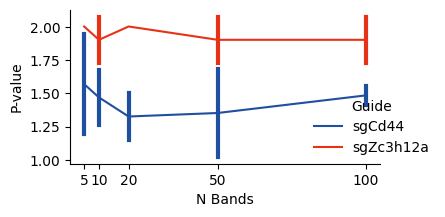

In [212]:
plot_df['log value'] = plot_df['value'].apply(lambda x: -np.log10(x))

plt.figure(figsize=(4, 2))
sns.lineplot(data=plot_df, x='index', y='log value', hue='variable', ci='sd', palette=['#1f4fa1', '#e83217'], err_style='bars', err_kws={'linewidth': 3}, errorbar='ed')
sns.despine()
plt.legend(title='Guide', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 0.5))
plt.xticks([5, 10, 20, 50, 100], ['5', '10', '20', '50', '100'])
plt.xlabel('N Bands')
plt.ylabel('P-value')
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240822-Pipeline/supplementary_images/PERMANOVA_n_bands.pdf', bbox_inches='tight', format='pdf')
plt.show()

# CLR transformation

In [5]:
# mdata = gdata[gdata.obs.marker == 'B926-1']
mdata = gdata
mdata.obs['cluster'] = fdata.obs.cluster_cellcharter_givenk.tolist()
c_df = pd.concat([pd.DataFrame(mdata.X, columns=mdata.var_names, index=mdata.obs_names), mdata.obs.cluster], axis=1)
c_df = c_df.groupby(['cluster']).sum().unstack().unstack()

g_df = c_df.apply(lambda x: 10 ** (np.log10(x + 1) - (np.log10(x + 1).sum() / 12)), axis=1)
g_df.head()

cluster,0,1,2,3,4,5,6,7,8,9,10,11
sgAdrb2,0.994036,2.857396,0.784959,3.836760,1.291147,0.509856,0.267766,1.646946,0.286106,0.315451,1.518565,2.938092
sgAqp3,1.121506,2.648440,0.742406,5.275818,1.095180,0.384366,0.410692,1.242608,0.321183,0.273795,1.711218,2.658970
sgArntl,0.977077,2.958371,0.768995,2.569349,1.429427,0.452350,0.407115,1.501803,0.271410,0.361880,1.528944,2.949324
sgCd44,0.899275,2.577921,0.559549,6.434810,0.879291,0.339726,0.439645,0.979210,0.579533,0.259790,2.438034,2.537953
sgCd52,0.923884,2.839954,0.981402,2.714133,1.326510,0.593155,0.301970,1.747111,0.280401,0.298375,1.211474,3.400755


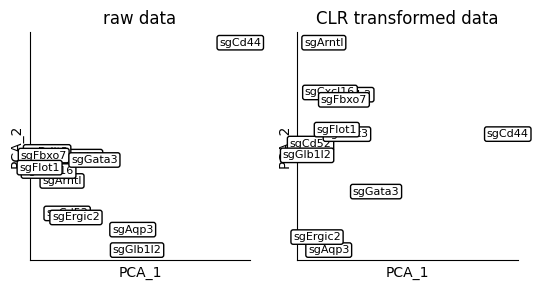

In [123]:
# perform PCA for c_df and g_df
from sklearn.decomposition import PCA
pca_c = PCA(n_components=2)
pca_c.fit(c_df)
pca_g = PCA(n_components=2)
pca_g.fit(g_df)

# 绘制 pca_c 和 pca_g 的 PCA_1 和 PCA_2
plt.figure(figsize=(5.5, 3))

# 绘制 pca_c 的 PCA_1 和 PCA_2
plt.subplot(1, 2, 1)
plt.scatter(pca_c.components_[0], pca_c.components_[1], c='royalblue', label='pca_c')
for i in range(len(pca_c.components_[0])):
    plt.text(pca_c.components_[0][i], pca_c.components_[1][i], gdata.var_names[i], rotation=0, fontsize=8, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1))
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.xticks([])
plt.yticks([])
plt.title('raw data')

plt.subplot(1, 2, 2)
plt.scatter(pca_g.components_[0], pca_g.components_[1], c='tomato', label='pca_g')
for i in range(len(pca_g.components_[0])):
    plt.text(pca_g.components_[0][i], pca_g.components_[1][i], gdata.var_names[i], rotation=0, fontsize=8, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1))
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.xticks([])
plt.yticks([])
plt.title('CLR transformed data')

sns.despine()

plt.tight_layout()
plt.show()


In [55]:
dist.values

array([0.62887441, 1.0477939 , 1.79929909, 2.42990542, 1.77879665,
       1.83822614, 1.69445948, 0.53421043, 1.58465829, 0.80109942,
       0.2367972 , 0.75833537, 1.23300087, 1.54174261, 1.24618237,
       1.52790634, 1.71654248, 0.71282989, 3.18532854, 0.68730414,
       0.4932445 , 3.24663405, 0.76366128, 2.95780229, 0.41382337,
       0.5914637 , 1.20884156, 1.19943432, 0.99782407, 1.04047694,
       1.86223657, 1.30148348, 1.46964012, 0.        ])

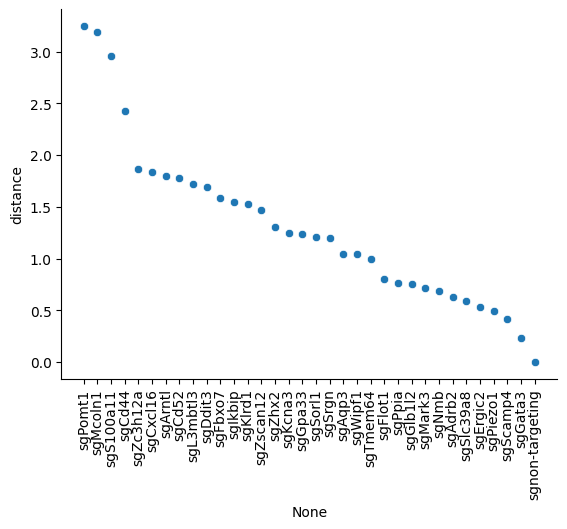

In [64]:
from scipy.spatial.distance import euclidean
dist = g_df.apply(lambda x: euclidean(x, g_df.loc['sgnon-targeting']), axis=1).values
plot_df = pd.DataFrame(dist, index=g_df.index, columns=['distance']).sort_values(by='distance', ascending=False)

sns.scatterplot(x=plot_df.index, y=plot_df.distance)
plt.xticks(rotation=90)
sns.despine()
plt.show()

# Cross sample

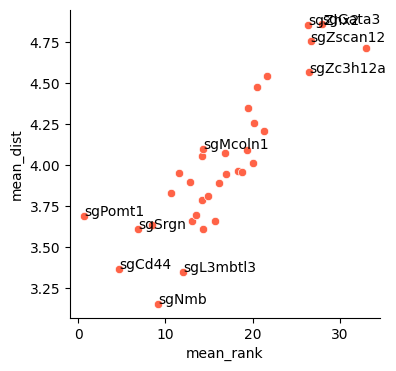

In [110]:
gdata.obs['cluster'] = fdata.obs.cluster_cellcharter_givenk.tolist()
rank_df = pd.DataFrame()
for marker in gdata.obs.marker.cat.categories:
    mdata = gdata[gdata.obs.marker == marker]
    c_df = pd.concat([pd.DataFrame(mdata.X, columns=mdata.var_names, index=mdata.obs_names), mdata.obs.cluster], axis=1)
    c_df = c_df.groupby(['cluster']).sum().unstack().unstack()

    g_df = c_df.apply(lambda x: 10 ** (np.log10(x + 1) - (np.log10(x + 1).sum() / 12)), axis=1)
    dist = g_df.apply(lambda x: euclidean(x, g_df.loc['sgnon-targeting']), axis=1).values
    dist = pd.DataFrame(dist, index=g_df.index, columns=[marker])
    dist.sort_values(by=marker, ascending=False, inplace=True)
    dist[f'rank_{marker}'] = range(len(dist))

    rank_df = pd.concat([rank_df, pd.DataFrame(dist, index=g_df.index, columns=[f'rank_{marker}', marker])], axis=1)
# rank_df.columns = gdata.obs.marker.cat.categories + gdata.obs.marker.cat.categories
rank_df['mean_rank'] = rank_df.loc[:, rank_df.columns.str.startswith('rank_')].mean(axis=1)
rank_df['mean_dist'] = rank_df.loc[:, ~rank_df.columns.str.startswith('rank_')].mean(axis=1)
rank_df.sort_values(by='mean_rank', inplace=True)

plt.figure(figsize=(4, 4))
sns.scatterplot(data=rank_df, x='mean_rank', y='mean_dist', color='tomato')

for row in rank_df.index:
    if row in ['sgCd44', 'sgZc3h12a', 'sgPomt1', 'sgGata3', 'sgZscan12', 'sgNmb', 'sgZhx2', 'sgSrgn', 'sgL3mbtl3', 'sgMcoln1']:
        plt.text(rank_df.loc[row, 'mean_rank'], rank_df.loc[row, 'mean_dist'], row, rotation=0)
sns.despine()
# plt.show()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240822-Pipeline/supplementary_images/rank_dist_scatter.pdf', bbox_inches='tight', format='pdf')
plt.show()

# Add permutation

In [34]:
import warnings
from tqdm import tqdm
from skbio.stats.distance import permanova, DistanceMatrix
from scipy.spatial.distance import pdist, squareform
from scipy.stats import gaussian_kde
import random
warnings.filterwarnings('ignore')

N_PERMUTE = 100

p_value = {}
p_value_permute = {}
for guide in tqdm(gdata.var_names):
    if guide == 'sgnon-targeting': continue
    g_df = c_df[[guide, "sgnon-targeting", "cluster"]]

    masks = {c: (g_df.cluster == c) for c in g_df.cluster.unique()}

    df = pd.DataFrame(index=range(12))
    g_df = c_df[[guide, "sgnon-targeting", "cluster"]]

    guide_df = g_df.groupby(['cluster', guide]).count().unstack()['sgnon-targeting']
    guide_cnts = df.copy()
    max_count = guide_df.columns.max()
    x_grid = np.linspace(0, max_count + 0.5, 10)
    
    guide_cnts = []
    for cluster in range(12):
        if cluster in guide_df.index:
            counts = guide_df.loc[cluster].dropna()
            kde = gaussian_kde(counts)
            density = kde(x_grid)
            density = density / density.sum()  # 归一化
            guide_cnts.append(density)
        else:
            guide_cnts.append(np.zeros_like(x_grid))
    guide_cnts = np.array(guide_cnts)

    ntc_df = g_df.groupby(['cluster', 'sgnon-targeting']).count().unstack()[guide]
    ntc_cnts = df.copy()
    max_count = ntc_df.columns.max()
    x_grid = np.linspace(0, max_count + 0.5, 10)
    
    ntc_cnts = []
    for cluster in range(12):
        if cluster in ntc_df.index:
            counts = ntc_df.loc[cluster].dropna()
            kde = gaussian_kde(counts)
            density = kde(x_grid)
            density = density / density.sum()  # 归一化
            ntc_cnts.append(density)
        else:
            ntc_cnts.append(np.zeros_like(x_grid))
            
    ntc_cnts = np.array(ntc_cnts)

    data = np.vstack([guide_cnts, ntc_cnts])
    sample_ids = np.array([[name + str(c) for c in g_df.cluster.unique()] for name in ['guide_', 'control_']]).flatten()

    dist_matrix = squareform(pdist(data, metric='braycurtis'))
    metadata = pd.DataFrame({
        'group': ['A'] * 12 + ['B'] * 12
    }, index=sample_ids)
    dm = DistanceMatrix(dist_matrix, ids=sample_ids)

    results = permanova(dm, metadata, column='group', permutations=10000)
    p_value[guide] = results['p-value']


    p_value_permute[guide] = []
    for i in range(N_PERMUTE):
        p_guide_cnts = guide_cnts.copy()
        p_ntc_cnts = ntc_cnts.copy()
        for j in range(12):
            if random.random() < 0.5:
                exchange_row = p_guide_cnts[j]
                p_guide_cnts[j] = p_ntc_cnts[j]
                p_ntc_cnts[j] = exchange_row

        p_data = np.vstack([p_guide_cnts, p_ntc_cnts])
        p_sample_ids = np.array([[name + str(c) for c in g_df.cluster.unique()] for name in ['guide_', 'control_']]).flatten()

        p_dist_matrix = squareform(pdist(p_data, metric='braycurtis'))
        p_metadata = pd.DataFrame({
            'group': ['A'] * 12 + ['B'] * 12
        }, index=p_sample_ids)
        p_dm = DistanceMatrix(p_dist_matrix, ids=p_sample_ids)
        p_results = permanova(p_dm, p_metadata, column='group', permutations=100)
        p_value_permute[guide].append(p_results['p-value'])

p_value_permute

  0%|          | 0/34 [00:00<?, ?it/s]


NameError: name 'c_df' is not defined

In [106]:
df = pd.concat([pd.DataFrame(p_value_permute), pd.DataFrame(p_value, columns=gdata.var_names, index=['p_value'])], axis=0)
df

,sgAdrb2,sgAqp3,sgArntl,sgCd44,sgCd52,sgCxcl16,sgDdit3,sgErgic2,sgFbxo7,sgFlot1,...,sgScamp4,sgSlc39a8,sgSorl1,sgSrgn,sgTmem64,sgWipf1,sgZc3h12a,sgZhx2,sgZscan12,sgnon-targeting
0,0.752475,0.910891,0.683168,0.584158,0.247525,0.227723,0.475248,0.623762,0.029703,0.188119,...,0.376238,0.336634,0.277228,0.514851,0.504950,0.168317,0.435644,0.089109,0.653465,NaN
1,0.574257,0.594059,0.099010,0.178218,0.128713,0.306931,0.158416,0.683168,0.069307,0.118812,...,0.742574,0.079208,0.029703,0.039604,0.178218,0.059406,0.069307,0.613861,0.613861,NaN
2,0.237624,0.376238,0.653465,0.099010,0.019802,0.950495,0.009901,0.821782,0.079208,0.356436,...,0.118812,0.247525,0.217822,0.702970,0.277228,0.019802,0.059406,0.029703,0.019802,NaN
3,0.297030,0.297030,0.861386,0.039604,0.059406,0.366337,0.376238,0.534653,0.138614,0.227723,...,0.178218,0.138614,0.495050,0.019802,0.118812,0.009901,0.029703,0.752475,0.851485,NaN
4,0.475248,0.306931,0.059406,0.138614,0.623762,0.465347,0.138614,0.831683,0.108911,0.237624,...,0.346535,0.514851,0.019802,0.019802,0.544554,0.079208,0.257426,0.554455,0.237624,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.851485,0.099010,0.079208,0.722772,0.168317,0.782178,0.059406,0.702970,0.306931,0.752475,...,0.019802,0.920792,0.425743,0.287129,0.138614,0.118812,0.118812,0.772277,0.069307,NaN
97,0.158416,0.920792,0.059406,0.584158,0.415842,0.257426,0.227723,0.722772,0.554455,0.495050,...,0.089109,0.217822,0.099010,0.198020,0.049505,0.009901,0.148515,0.257426,0.396040,NaN
98,0.425743,0.990099,0.306931,0.920792,0.900990,0.603960,0.485149,0.217822,0.009901,0.405941,...,0.029703,0.564356,0.158416,0.168317,0.188119,0.188119,0.079208,0.049505,0.227723,NaN
99,0.178218,0.455446,0.574257,0.198020,0.435644,0.633663,0.009901,0.336634,0.762376,0.019802,...,0.059406,0.237624,0.356436,0.029703,0.019802,0.089109,0.297030,0.247525,0.158416,NaN


In [107]:
# 计算每一列中小于p_value的数值的数量
result = {}
for col in df.columns:
    if col != 'sgnon-targeting':  # 跳过control guide
        # 获取除最后一行(p_value)外的所有值
        values = df[col].iloc[:-1]
        # 获取p_value值
        p_val = df[col].iloc[-1]
        # 计算小于p_value的数量
        count = (values < p_val).sum()
        result[col] = count

print(result)


{'sgAdrb2': 0, 'sgAqp3': 12, 'sgArntl': 8, 'sgCd44': 1, 'sgCd52': 5, 'sgCxcl16': 10, 'sgDdit3': 0, 'sgErgic2': 16, 'sgFbxo7': 0, 'sgFlot1': 8, 'sgGata3': 0, 'sgGlb1l2': 24, 'sgGpa33': 0, 'sgIkbip': 10, 'sgKcna3': 0, 'sgKlrd1': 0, 'sgL3mbtl3': 0, 'sgMark3': 4, 'sgMcoln1': 0, 'sgNmb': 0, 'sgPiezo1': 14, 'sgPomt1': 4, 'sgPpia': 0, 'sgS100a11': 0, 'sgScamp4': 0, 'sgSlc39a8': 14, 'sgSorl1': 0, 'sgSrgn': 10, 'sgTmem64': 0, 'sgWipf1': 0, 'sgZc3h12a': 0, 'sgZhx2': 0, 'sgZscan12': 0}


posx and posy should be finite values
posx and posy should be finite values


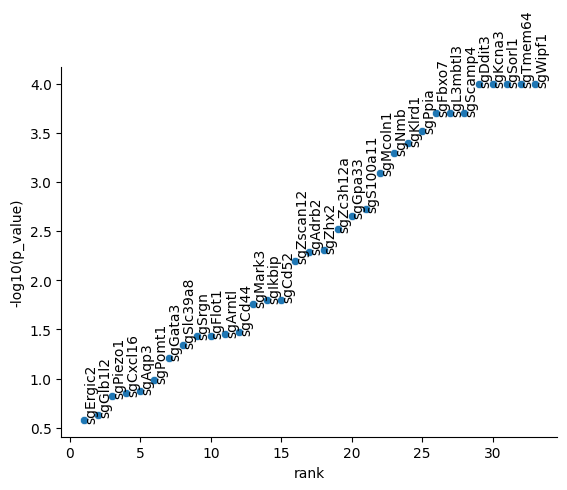

In [108]:
p_value_df = pd.DataFrame(df.loc['p_value'], index=gdata.var_names)
p_value_df['-log10(p_value)'] = p_value_df['p_value'].apply(lambda x: -np.log10(x))
p_value_df['rank'] = p_value_df['-log10(p_value)'].rank(method='first')
p_value_df.reset_index(inplace=True)
p_value_df.sort_values(by='-log10(p_value)', inplace=True)
sns.scatterplot(data=p_value_df, x='rank', y='-log10(p_value)')
for i in range(len(p_value_df)):
    plt.text(p_value_df['rank'].iloc[i], p_value_df['-log10(p_value)'].iloc[i], p_value_df['index'].iloc[i], rotation=90)
sns.despine()
plt.show()

# Cross sample

In [91]:
fdata = sc.read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/reclustered.h5")
fdata = fdata[:, ~fdata.var_names.str.startswith('sg')].copy()

gdata = sc.read_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.filtered.guide.bin100.h5')

fdata.obs['coord_x'] = fdata.obsm['spatial'][:, 0] // 100 * 100
fdata.obs['coord_y'] = fdata.obsm['spatial'][:, 1] // 100 * 100

gdata.obs['coord_x'] = gdata.obsm['spatial'][:, 0] // 100 * 100
gdata.obs['coord_y'] = gdata.obsm['spatial'][:, 1] // 100 * 100
fdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(fdata.obs['marker'], fdata.obs['coord_x'], fdata.obs['coord_y'])]
gdata.obs_names = [str(marker) + '_' + str(x) + '_' + str(y) for marker, x, y in zip(gdata.obs['marker'], gdata.obs['coord_x'], gdata.obs['coord_y'])]

common_bins = np.intersect1d(fdata.obs_names, gdata.obs_names)
fdata = fdata[common_bins].copy()
gdata = gdata[common_bins].copy()

fdata = fdata[fdata.obs.marker == 'A'].copy()
gdata = gdata[gdata.obs.marker == 'A'].copy()

fdata, gdata = utils.align_rna_guide_data(fdata, gdata)

gdata = utils.combine_guide_replicates(gdata)
gdata.obs.cluster = fdata.obs.cluster

/home/wpy/stereoseq/20240822-Pipeline/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()
/tmp/ipykernel_39774/3715081454.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gdata.obs.cluster = fdata.obs.cluster


In [92]:
from scipy.spatial.distance import euclidean

df = pd.DataFrame()
mdata = gdata
# mdata.obs['cluster'] = fdata[fdata.obs.marker == marker].obs.tolist()
c_df = pd.concat([pd.DataFrame(mdata.X, columns=mdata.var_names, index=mdata.obs_names), mdata.obs.cluster], axis=1)
c_df = c_df.groupby(['cluster']).sum().unstack().unstack()

g_df = c_df.apply(lambda x: 10 ** (np.log10(x + 1) - (np.log10(x + 1).sum() / 5)), axis=1)
dist = g_df.apply(lambda x: euclidean(x, g_df.loc['sgnon-targeting']), axis=1).values
plot_df = pd.DataFrame(dist, index=g_df.index, columns=['distance']).sort_values(by='distance', ascending=False)
df = pd.concat([df, plot_df], axis=1)
df.columns = gdata.obs.marker.unique()

for col in df.columns:
    # 对非NaN值进行排序和排名
    non_nan_mask = df[col].notna()
    df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
    # NaN值对应的rank也设为NaN
    df.loc[~non_nan_mask, col + '_rank'] = np.nan

# 计算每行非NaN的rank的平均值
rank_cols = df.columns[df.columns.str.endswith('rank')]
df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)  # skipna=True会忽略NaN值计算平均数
# df.rank_mean.sort_values().head()
df_base = df.copy()
# df_base.sort_values('rank_mean', ascending=True).head(2)
df_base

/tmp/ipykernel_39774/721425951.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c_df = c_df.groupby(['cluster']).sum().unstack().unstack()


,A,A_rank,rank_mean
sgDdit4,1.966068,1.0,1.0
sgCxcr2,1.929134,2.0,2.0
sgCxcr6,1.617789,3.0,3.0
sgTox,1.546332,4.0,4.0
sgCxcr3,1.530440,5.0,5.0
sgBhlhe40,1.452668,6.0,6.0
sgCcr4,1.121892,7.0,7.0
sgFos,1.120155,8.0,8.0
sgGpr35,1.048861,9.0,9.0
sgYbx1,1.022771,10.0,10.0


In [93]:
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

def permute_task(_):
    df = pd.DataFrame()
    for marker in gdata.obs.marker.unique():
        results = {}
        for guide in gdata.var_names:
            if guide == 'sgnon-targeting': continue
            p_guide_cnts = c_df.loc[guide].copy()
            p_ntc_cnts = c_df.loc['sgnon-targeting'].copy()
            for j in [0, 2, 3, 4, 6]:
                if random.random() < 0.5:
                    p_guide_cnts[j], p_ntc_cnts[j] = p_ntc_cnts[j], p_guide_cnts[j]
            p_data = np.vstack([10 ** (np.log10(p_guide_cnts + 1) - (np.log10(p_guide_cnts + 1).sum() / 5)),
                                10 ** (np.log10(p_ntc_cnts + 1) - (np.log10(p_ntc_cnts + 1).sum() / 5))])
            dist = euclidean(p_data[0], p_data[1])
            results[guide] = dist
        df = pd.concat([df, pd.DataFrame(results, index=[marker]).T], axis=1)
    for col in df.columns:
        non_nan_mask = df[col].notna()
        df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
        df.loc[~non_nan_mask, col + '_rank'] = np.nan

    result = {}
    for guide in gdata.var_names:
        if guide != 'sgnon-targeting':
            result[guide] = df.loc[guide, 'A']
    return result

N_PERMUTE = [10000]
s = {}

for n_permute in N_PERMUTE:
    with Pool(cpu_count()) as pool:
        s[n_permute] = list(tqdm(pool.imap(permute_task, range(n_permute)), total=n_permute))

100%|██████████| 10000/10000 [00:12<00:00, 825.49it/s]


In [117]:
df = pd.concat([pd.DataFrame(s[10000]).T, df_base.A], axis=1).dropna().T
df = df.div(df.loc['A'], axis=1)
# df
df = (df <= 1).sum(axis=0)
df

sgAckr3      1867
sgBatf        674
sgBcl2        647
sgBcl2l11     617
sgBhlhe40     596
sgCcr1        632
sgCcr10       592
sgCcr2        601
sgCcr4        626
sgCcr5        608
sgCcr6        636
sgCcr7        600
sgCd74        629
sgCxcr1       614
sgCxcr2       641
sgCxcr3       613
sgCxcr4       652
sgCxcr5       610
sgCxcr6       632
sgDdit4       578
sgElob        635
sgFos         640
sgFoxp1       620
sgGpr35       641
sgHopx        667
sgJun         628
sgJund        630
sgKlf2        607
sgTgif1       623
sgTox         624
sgYbx1        652
dtype: int64

In [48]:
from tqdm import tqdm

N_PERMUTE = [100, 200, 500, 1000]
n_permutation = ['500', '1000', '5000', '10000']

s = {}
for n_permute in N_PERMUTE:
    s[n_permute] = []
    for _ in tqdm(range(n_permute)):
        df = pd.DataFrame()
        for marker in gdata.obs.marker.unique():
            results = {}
            for guide in gdata.var_names:
                if guide == 'sgnon-targeting': continue
                p_guide_cnts = c_df.loc[guide].copy()
                p_ntc_cnts = c_df.loc['sgnon-targeting'].copy()
                for j in [0, 2, 3, 4, 6]:
                    if random.random() < 0.5:
                        p_guide_cnts[j], p_ntc_cnts[j] = p_ntc_cnts[j], p_guide_cnts[j]
                p_data = np.vstack([10 ** (np.log10(p_guide_cnts + 1) - (np.log10(p_guide_cnts + 1).sum() / 5)),
                                    10 ** (np.log10(p_ntc_cnts + 1) - (np.log10(p_ntc_cnts + 1).sum() / 5))])
                dist = euclidean(p_data[0], p_data[1])
                results[guide] = dist
            df = pd.concat([df, pd.DataFrame(results, index=[marker]).T], axis=1)
        for col in df.columns:
            # 对非NaN值进行排序和排名
            non_nan_mask = df[col].notna()
            df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
            # NaN值对应的rank也设为NaN
            df.loc[~non_nan_mask, col + '_rank'] = np.nan

        # 计算每行非NaN的rank的平均值
        # rank_cols = df.columns[df.columns.str.endswith('rank')]
        # df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)  # skipna=True会忽略NaN值计算平均数
        # df.rank_mean.sort_values().head()
        # df_base = df.copy()
        # df_base.sort_values('rank_mean', ascending=True).head(2)

        result = {}
        for guide in gdata.var_names:
            if guide != 'sgnon-targeting':
                result[guide] = df.loc[guide, 'A']
        s[n_permute].append(result)

  7%|▋         | 7/100 [00:00<00:03, 28.88it/s]

100%|██████████| 1000/1000 [00:48<00:00, 20.45it/s]


In [28]:
sgBhlhe40 = {}
sgAckr3 = {}
for n_permute in N_PERMUTE:
    sgBhlhe40[n_permute] = []
    for i in range(len(s[n_permute])):
        sgBhlhe40[n_permute].append(s[n_permute][i]['sgBatf'])
    sgAckr3[n_permute] = []
    for i in range(len(s[n_permute])):
        sgAckr3[n_permute].append(s[n_permute][i]['sgAckr3'])

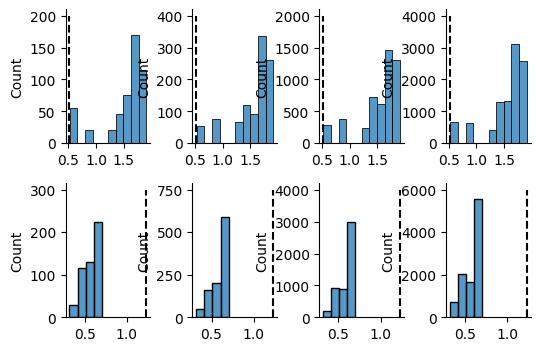

In [46]:
_, ax = plt.subplots(2, 4, figsize=(6, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
n_perms = [100, 200, 500, 1000]
# permute_times = ['500', '1000', '5000', '10000']
for i, n_perm in enumerate(n_perms):
    # if n_perm == 100: continue
    for guide in gdata.var_names:
        if guide == 'sgBhlhe40':
            sns.histplot(sgBhlhe40[n_perm], label=f'{n_perm} permutations', ax=ax[0, i], bins=10, line_kws={'width': 0})
        if guide == 'sgAckr3':
            sns.histplot(sgAckr3[n_perm], label=f'{n_perm} permutations', ax=ax[1, i], bins=4)
    if i == 0 or i == 1:
        ax[0, i].set_yticks(ax[0, i].get_yticks(), [int(tick * 5) for tick in ax[0, i].get_yticks()])
        ax[1, i].set_yticks(ax[1, i].get_yticks(), [int(tick * 5) for tick in ax[1, i].get_yticks()])
    elif i == 2 or i == 3:
        ax[0, i].set_yticks(ax[0, i].get_yticks(), [int(tick * 10) for tick in ax[0, i].get_yticks()])
        ax[1, i].set_yticks(ax[1, i].get_yticks(), [int(tick * 10) for tick in ax[1, i].get_yticks()])
for i in range(4):
    ax[0, i].vlines(0.52, 0, ax[0, i].get_ylim()[1], color='black', linestyle='--')
    ax[1, i].vlines(1.23, 0, ax[1, i].get_ylim()[1], color='black', linestyle='--')
sns.despine()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/Aitchison_n_permutations.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [5]:
from tqdm import tqdm

N_PERMUTE = [100, 200, 500, 1000]
n_permutation = ['500', '1000', '5000', '10000']

s = {}
for n_permute in N_PERMUTE:
    s[n_permute] = []
    for _ in tqdm(range(n_permute)):
        df = pd.DataFrame()
        for marker in gdata.obs.marker.unique():
            results = {}
            for guide in gdata.var_names:
                if guide == 'sgnon-targeting': continue
                p_guide_cnts = c_df.loc[guide].copy()
                p_ntc_cnts = c_df.loc['sgnon-targeting'].copy()
                for j in range(12):
                    if random.random() < 0.5:
                        p_guide_cnts[j], p_ntc_cnts[j] = p_ntc_cnts[j], p_guide_cnts[j]
                p_data = np.vstack([10 ** (np.log10(p_guide_cnts + 1) - (np.log10(p_guide_cnts + 1).sum() / 12)),
                                    10 ** (np.log10(p_ntc_cnts + 1) - (np.log10(p_ntc_cnts + 1).sum() / 12))])
                dist = euclidean(p_data[0], p_data[1])
                results[guide] = dist
            df = pd.concat([df, pd.DataFrame(results, index=[marker]).T], axis=1)
        for col in df.columns:
            # 对非NaN值进行排序和排名
            non_nan_mask = df[col].notna()
            df.loc[non_nan_mask, col + '_rank'] = df.loc[non_nan_mask, col].rank(ascending=False)
            # NaN值对应的rank也设为NaN
            df.loc[~non_nan_mask, col + '_rank'] = np.nan

        # 计算每行非NaN的rank的平均值
        # rank_cols = df.columns[df.columns.str.endswith('rank')]
        # df['rank_mean'] = df[rank_cols].mean(axis=1, skipna=True)  # skipna=True会忽略NaN值计算平均数
        # df.rank_mean.sort_values().head()
        # df_base = df.copy()
        # df_base.sort_values('rank_mean', ascending=True).head(2)

        result = {}
        for guide in gdata.var_names:
            if guide != 'sgnon-targeting':
                result[guide] = df.loc[guide, '2-1']
        s[n_permute].append(result)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:35<00:00,  4.63it/s]


In [6]:
sgCd44 = {}
sgZc3h12a = {}
for n_permute in N_PERMUTE:
    sgCd44[n_permute] = []
    for i in range(len(s[n_permute])):
        sgCd44[n_permute].append(s[n_permute][i]['sgCd44'])
    sgZc3h12a[n_permute] = []
    for i in range(len(s[n_permute])):
        sgZc3h12a[n_permute].append(s[n_permute][i]['sgZc3h12a'])

In [10]:
df

,1-1,1-2,2-1,2-2,3-1,3-2,1-1_rank,1-2_rank,2-1_rank,2-2_rank,3-1_rank,3-2_rank
sgAdrb2,17.461866,16.103034,16.317199,15.756814,18.112467,22.867106,17.0,17.0,18.0,18.0,17.0,15.0
sgAqp3,41.274537,59.148663,44.211701,79.877998,40.475403,42.000992,9.0,2.0,9.0,1.0,9.0,8.0
sgArntl,49.715657,40.498945,52.155845,41.115714,41.046530,43.115935,6.0,10.0,5.0,7.0,8.0,7.0
sgCd44,58.288294,56.066651,64.066621,47.649043,48.687240,47.713828,1.0,3.0,2.0,6.0,7.0,6.0
sgCd52,3.366455,4.114604,4.304844,3.978134,3.942531,4.207454,31.0,30.0,31.0,30.0,31.0,30.0
sgCxcl16,6.811660,6.970956,7.265699,8.541951,6.479687,7.558504,28.0,25.0,26.0,25.0,28.0,25.0
sgDdit3,9.502222,5.183916,10.156341,11.281955,7.417126,8.091038,23.0,29.0,22.0,21.0,26.0,24.0
sgErgic2,7.935934,6.814451,8.832493,7.458708,7.949656,6.252266,25.0,26.0,25.0,28.0,24.0,29.0
sgFbxo7,30.726080,29.054428,32.462054,26.275975,26.996542,31.468508,14.0,13.0,14.0,13.0,13.0,13.0
sgFlot1,16.492471,14.758479,21.945141,14.049445,14.402371,16.852886,18.0,18.0,16.0,19.0,18.0,18.0


In [17]:
(np.array(sgZc3h12a[1000]) < 11.050967).sum()

662

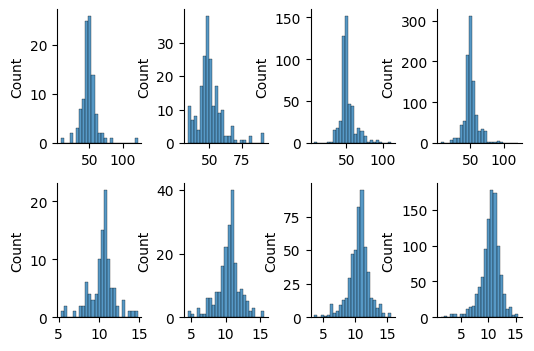

In [9]:
_, ax = plt.subplots(2, 4, figsize=(6, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
n_perms = [100, 200, 500, 1000]
permute_times = ['500', '1000', '5000', '10000']
for i, n_perm in enumerate(n_perms):
    # if n_perm == 100: continue
    for guide in gdata.var_names:
        if guide == 'sgCd44':
            sns.histplot(sgCd44[n_perm], label=f'{n_perm} permutations', ax=ax[0, i], bins=25, line_kws={'width': 0})
        if guide == 'sgAqp3':
            sns.histplot(sgZc3h12a[n_perm], label=f'{n_perm} permutations', ax=ax[1, i], bins=25)
    # ax[i].legend()
sns.despine()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240822-Pipeline/supplementary_images/Aitchison_n_permutations.pdf', bbox_inches='tight', format='pdf')
plt.show()

# KL vs Wasserstein

In [209]:
from scipy.spatial.distance import cdist

plot_data = gdata[gdata.obs.marker == '2-2']

cd44_bin = plot_data[plot_data[:, 'sgCd44'].X.toarray().flatten() > 0, :].obsm['spatial']
zc3h12a_bin = plot_data[plot_data[:, 'sgZc3h12a'].X.toarray().flatten() > 0, :].obsm['spatial']
gata3_bin = plot_data[plot_data[:, 'sgGata3'].X.toarray().flatten() > 0, :].obsm['spatial']
ntc_bin = plot_data[plot_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0, :].obsm['spatial']

gata3_dist = cdist(gata3_bin, ntc_bin, metric='euclidean')
cd44_dist = cdist(cd44_bin, ntc_bin, metric='euclidean')
zc3h12a_dist = cdist(zc3h12a_bin, ntc_bin, metric='euclidean')

cd44_weight = plot_data[plot_data[:, 'sgCd44'].X.toarray().flatten() > 0, 'sgCd44'].X.toarray().flatten()
cd44_weight = cd44_weight / cd44_weight.sum()
zc3h12a_weight = plot_data[plot_data[:, 'sgZc3h12a'].X.toarray().flatten() > 0, 'sgZc3h12a'].X.toarray().flatten()
zc3h12a_weight = zc3h12a_weight / zc3h12a_weight.sum()
gata3_weight = plot_data[plot_data[:, 'sgGata3'].X.toarray().flatten() > 0, 'sgGata3'].X.toarray().flatten()
gata3_weight = gata3_weight / gata3_weight.sum()

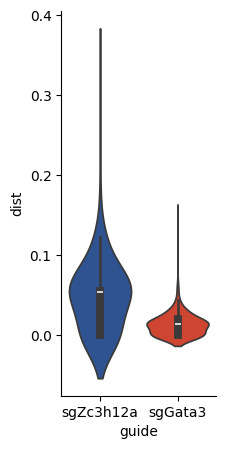

In [165]:
df = pd.DataFrame({
    'guide': ['sgZc3h12a'] * len(zc3h12a_dist) + ['sgGata3'] * len(gata3_dist),
    'dist': list((zc3h12a_weight[:, np.newaxis] * zc3h12a_dist).min(axis=1)) + \
            list((gata3_weight[:, np.newaxis] * gata3_dist).min(axis=1)),
    # 'dist': list((zc3h12a_dist).min(axis=1)) + \
            # list((gata3_dist).min(axis=1)),
})
# plt.yscale('log')
plt.figure(figsize=(2, 5))
sns.violinplot(data=df, x='guide', y='dist', bw_adjust=3, hue='guide', palette=['#1f4fa1', '#e83217'])

sns.despine()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240822-Pipeline/supplementary_images/distance_violin_plot.pdf', bbox_inches='tight', format='pdf')
plt.show()
# plt.ylim(180, 220)

100%|██████████| 1735/1735 [00:02<00:00, 693.32it/s]


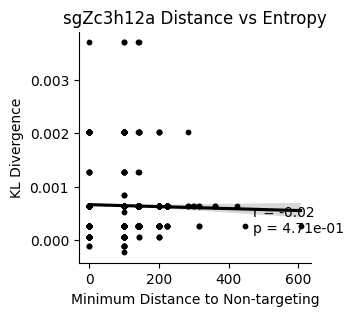

In [231]:
# 计算每个bin的熵
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

plot_data = gdata[gdata.obs.marker == '1-2']
# 获取sgZc3h12a和non-targeting的空间分布数据
zc3h12a_data = plot_data[(plot_data[:, 'sgZc3h12a'].X.toarray().flatten() > 0), 'sgZc3h12a']
ntc_data = plot_data[(plot_data[:, 'sgnon-targeting'].X.toarray().flatten() > 0), 'sgnon-targeting']

zc3h12a_dist = cdist(zc3h12a_data.obsm['spatial'], ntc_data.obsm['spatial'], metric='euclidean')
# 计算每个bin的KL散度
bin_entropies = []
z_sum = zc3h12a_data[:, 'sgZc3h12a'].X.toarray().sum()
ntc_sum = ntc_data[:, 'sgnon-targeting'].X.toarray().sum()
for i in tqdm(range(len(zc3h12a_data))):
    p_z = zc3h12a_data[i, 'sgZc3h12a'].X.toarray().flatten()[0]
    p_ntc = ntc_data[i, 'sgnon-targeting'].X.toarray().flatten()[0]
    p_z = p_z / z_sum
    p_ntc = p_ntc / ntc_sum
    bin_entropies.append(p_z * np.log(p_z / (p_ntc + 1e-10)))

# 绘制散点图
plt.figure(figsize=(3, 3))
plt.scatter(zc3h12a_dist.min(axis=1), bin_entropies, alpha=1, color='black', s=10)
sns.regplot(x=zc3h12a_dist.min(axis=1), y=bin_entropies, scatter=False, line_kws={'color': 'black'})

# 计算相关系数
from scipy import stats
corr, p_val = stats.spearmanr(zc3h12a_dist.min(axis=1), bin_entropies)

# 在图上添加相关系数文本
plt.text(0.75, 0.25, f'r = {corr:.2f}\np = {p_val:.2e}', 
         transform=plt.gca().transAxes,
         verticalalignment='top')

# sns.kdeplot(x=zc3h12a_dist.min(axis=1), y=np.log10(bin_entropies), alpha=1, cmap='Reds', bw_adjust=0.5, levels=20, fill=True)
plt.xlabel('Minimum Distance to Non-targeting')
plt.ylabel('KL Divergence')
plt.title('sgZc3h12a Distance vs Entropy')

# plt.ylim(0.84, 0.94)
# plt.xscale('')
# plt.yticks([0.85, 0.87, 0.89, 0.91, 0.93], [0.85, 0.87, 0.89, 0.91, 0.93])

sns.despine()
# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('/home/wpy/stereoseq/20240822-Pipeline/supplementary_images/entropy_distance_scatter.pdf', bbox_inches='tight', format='pdf')
plt.show()